<p style="text-align: center;"> <font size=16>E-commerce Customer Churn</font></p>

----

# # Business Problem

**Context:**<br>
&emsp;&emsp;&emsp;Referring to the BRI website, `Electronic commerce or e-commerce` is a buying and selling transaction process which in practice is carried out online via electronic media. According to Laudon & Laudon, e-commerce is a business-to-business transaction that occurs through an internet network intermediary. In the world of commerce, e-commerce offers many changes. The buying and selling process no longer requires face-to-face meetings like in conventional stores. Sellers and buyers only need to process transactions online. Currently the means of e-commerce are not only through telephone and television, but now more often use the internet. With the existence of e-commerce, of course it becomes easier for customers to carry out shopping transactions so that customers also have the possibility of being able to shop more, which also provides more benefits for e-commerce.

&emsp;&emsp;&emsp;From this explanation, it can be seen that customers have a very important role in e-commerce activities, so e-commerce needs to think about how to ensure customers have `a satisfying shopping experience`. If customers feel they are not getting this experience, these customers have the potential to leave the business. Of course, `there are other factors` that can make customers abandon e-commerce. Therefore, e-commerce owners need to analyze and predict whether customers will stay or leave the business or what we can call the customer churn rate.

&emsp;&emsp;&emsp;`Customer churn`, or `attrition`, is the rate at which clients choose not to purchase more (or no longer use) a company's products or services. Customer churn occurs when customers `stop consuming` a brand or product. They stop and no longer buy or use the products and services. Therefore, any business must pay full attention to this one measure. This measure is important because it can affect the company's profitability and growth. Losing loyal customers is certainly a source of sadness for your product. Not only that, you also lose a steady source of income and have to `incur greater costs` to acquire new customers who can replace the lost customers. In fact, acquiring new customers is 5 times more expensive than retaining existing customers, and making new customers loyal is also 16 times more expensive. So, a strategy is needed to stop customer churn or lose customers and retain the customers you already have, because they are the main source of business revenue.

&emsp;&emsp;&emsp;In this project, it is assumed that the client is an online retail company (E-commerce) who wants to know which customers will churn. By using predictions made from machine learning, it is hoped that clients can classify which customers will churn and which customers will not so that they can approach customers who are predicted to churn to offer several promotions in order to retain these customers to continue shopping at e-commerce.

&emsp;&emsp;&emsp;From several references that I have read, predicting customer churn can be done by looking at customer churn patterns, namely simply dividing the number of customers lost by the total customers of your business over a certain period of time. Then multiply the result by 100% to form a percentage value. Divide the number of lost customers by the total number of original customers to see the percentage. The following is the Churn Rate formula:

`Churn Rate = (Number of lost customers/total number of customers from the beginning of the period) x 100%`

&emsp;&emsp;&emsp;After getting the churn rate value, a churn rate is obtained where this value will be monitored over a period so that a trend pattern can be obtained which can provide insight into future churn rate predictions.

&emsp;&emsp;&emsp;However, this method is `only used to predict the churn rate`, while the way to `personally predict whether a customer will churn or not is still lacking`. This is why machine learning is needed which can be used to predict whether a customer will churn or not so that e-commerce can take preventive action so that the customer does not churn.

&emsp;&emsp;&emsp;After obtaining predictions about customers who might churn, the e-commerce party can provide action in the form of notifications or promo e-mails so that customers will be interested in shopping at the e-commerce site again.

`Target :`
- `0 :` Customer who will not churn
- `1 :` Customer who will churn

**Metric Evaluation:**

![Alt text](https://cdn-images-1.medium.com/max/800/1*_JY_jxfndH8oBI3clamifA.png "Confusion Matrix")

Type 1 error: `False Positive (FP)`<br>
Consequences: Potential reduction in profits obtained from stock sales due to promotional target errors

Type 2 error: `False Negative (FN)`<br>
Consequences: Customers stop buying stock items in e-commerce

In the customer churn problem, `both consequences are important`. `Precision is important` because it measures the model's accuracy in identifying customers who are likely to churn. High precision means the model correctly identifies customers who are likely to churn, which is important for taking proactive action to prevent churn. `Recall is also important` because it measures the model's ability to identify all customers who are likely to churn. High recall means the model correctly identified all customers who are likely to churn, which is important to ensure that no customers who are likely to churn are missed. 

Therefore, both precision and recall are important in the churn customer problem in machine learning. So the appropriate evaluation metric to use in this case is the `F-score` because it can ensure that the model we choose has balanced recall and precision values. Based on the consequences, what we will do as much as possible is to create a model that can `minimize customer churn` from e-commerce, but `does not consider promotional target errors` because it is considered `a strategy to attract new customers or increase sales`. So we want to minimize `False Negatives` as much as possible. So the main evaluation score metric used in this project will be the `F2-score` because it `prioritizes recall over precision`, making it more appropriate for situations where minimizing false negatives is the main concern.

# # Dataset Understanding:

| Attribute | Data Type | Description |
| --- | --- | --- |
| Tenure | `float64` | Tenure of a customer in the company |
| WarehouseToHome | `float64` | Distance between the warehouse to the customer’s home |
| NumberOfDeviceRegistered | `int64` | Total number of devices is registered on a particular customer |
| PreferedOrderCat | `object`  | Preferred order category of a customer in the last month |
| SatisfactionScore | `int64`   | Satisfactory score of a customer on service |
| MaritalStatus | `object`  | Marital status of a customer |
| NumberOfAddress | `int64`   | Total number of added on a particular customer |
| Complaint | `int64`  | Any complaint has been raised in the last month |
| DaySinceLastOrder | `float64` | Day since last order by customer |
| CashbackAmount | `float64` | Average cashback in last month |
| Churn | `int64` | Churn flag |

In [4]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, PolynomialFeatures
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as skPipeline
import category_encoders as ce
from sklearn.feature_selection import chi2

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm.sklearn import LGBMClassifier

# Model Benchmark
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_validate
from sklearn.metrics import get_scorer_names, precision_score, recall_score, fbeta_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, make_scorer, classification_report

# Imbalance Sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC, ADASYN, KMeansSMOTE, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NearMiss
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import Pipeline as imPipeline
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced

# Dependencies Test
from scipy.stats import chi2_contingency

import shap
import lime

from sklearn.inspection import PartialDependenceDisplay

import warnings
warnings.filterwarnings('ignore')

# # Data Ingestion

In [5]:
churnTMP = churn = pd.read_csv(r'E:\VA-Purwadhika\Capstone Project\Module 03 - Machine Learning\E-commerce Customers Churn\data_ecommerce_customer_churn.csv')
churn.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


# # Exploratory Data Analysis (Uncleaned)

## Input Correction

### Type Correction

In [6]:
churnTMP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


**Insight :**
- There are 11 variables, of which `9 variables` have a `numeric` data type and `2 variables` have an `object` data type.

- `Numeric data` in this dataset are **Tenure, WarehouseToHome, NumberOfDeviceRegistered, SatisfactionScore, NumberOfAddress, Complain,
DaySinceLastOrder, and CashbackAmount**
- `Object data` in this dataset are **PreferedOrderCat and MaritalStatus**

### Typo Correction

In [7]:
catClass = churnTMP.select_dtypes('object')
dfCat = pd.DataFrame({
    'Columns' : catClass.columns,
    'n-Unique' : [catClass[col].nunique() for col in catClass.columns],
    'Unique' : [catClass[col].unique() for col in catClass.columns]
})
dfCat

,Columns,n-Unique,Unique
0,PreferedOrderCat,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
1,MaritalStatus,3,"[Single, Married, Divorced]"


In [8]:
catClass['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Fashion', 'Others',
       'Mobile Phone', 'Grocery'], dtype=object)

In [9]:
numClass = churnTMP.select_dtypes('number')
dfNum = pd.DataFrame({
    'Columns' : numClass.columns,
    'n-Unique' : [numClass[col].nunique() for col in numClass.columns],
    'Unique' : [numClass[col].unique() for col in numClass.columns]
})
dfNum

,Columns,n-Unique,Unique
0,Tenure,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,6,"[4, 3, 6, 2, 5, 1]"
3,SatisfactionScore,5,"[3, 1, 4, 2, 5]"
4,NumberOfAddress,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
5,Complain,2,"[0, 1]"
6,DaySinceLastOrder,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
7,CashbackAmount,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."
8,Churn,2,"[0, 1]"


**Insight :**

- There are a total of `6 unique values` for PreferredOrderCat namely **['Laptop & Accessories', 'Mobile Phones', 'Fashion', 'Others', 'Mobile Phones', 'Shop grocery']**

- There are a total of `3 unique values` for MaritalStatus namely **[Single, Married, Divorced]**
- There are `various numbers` of unique values for each variable in numeric type data where each variable has a `varying range` of values

## Anomalies Handling

### Missing Value

In [10]:
churnTMP.isna().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

In [11]:
((churnTMP.isna().sum() / len(churnTMP))*100).round(2)

Tenure                      4.92
WarehouseToHome             4.29
NumberOfDeviceRegistered    0.00
PreferedOrderCat            0.00
SatisfactionScore           0.00
MaritalStatus               0.00
NumberOfAddress             0.00
Complain                    0.00
DaySinceLastOrder           5.40
CashbackAmount              0.00
Churn                       0.00
dtype: float64

In [12]:
((churnTMP.isna().any(axis=1).sum() / len(churnTMP))*100).round(2)

14.62

In [13]:
churnTMP[(churnTMP['Tenure'].isna())]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
16,NaN,21.0,5,Mobile,1,Married,1,1,3.0,121.68,0
37,NaN,6.0,4,Mobile,5,Married,2,0,2.0,122.18,0
44,NaN,7.0,4,Mobile,3,Married,2,0,0.0,120.08,0
85,NaN,6.0,3,Mobile,1,Married,4,0,2.0,122.70,0
93,NaN,15.0,3,Mobile,1,Married,4,0,3.0,120.75,0
...,...,...,...,...,...,...,...,...,...,...,...
3842,NaN,26.0,3,Mobile,3,Married,5,0,0.0,122.59,0
3853,NaN,28.0,3,Mobile Phone,3,Single,2,1,0.0,116.75,1
3879,NaN,16.0,3,Mobile,4,Married,2,0,2.0,122.97,0
3890,NaN,9.0,3,Mobile Phone,3,Single,2,0,0.0,114.20,1


In [14]:
churnTMP[(churnTMP['WarehouseToHome'].isna())]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
27,0.0,NaN,1,Mobile,3,Single,4,1,3.0,124.32,1
33,0.0,NaN,4,Mobile,4,Divorced,6,0,1.0,125.46,1
34,0.0,NaN,4,Mobile,1,Married,6,0,3.0,123.67,1
35,0.0,NaN,3,Mobile,5,Married,4,0,0.0,123.22,0
57,0.0,NaN,4,Mobile,4,Married,2,0,3.0,123.68,0
...,...,...,...,...,...,...,...,...,...,...,...
3871,7.0,NaN,1,Mobile,3,Married,1,0,0.0,125.85,0
3898,0.0,NaN,3,Mobile,3,Married,2,0,2.0,126.10,1
3900,0.0,NaN,4,Mobile,1,Single,2,1,0.0,124.39,1
3907,2.0,NaN,3,Mobile,5,Divorced,8,1,2.0,124.04,1


In [15]:
churnTMP[(churnTMP['DaySinceLastOrder'].isna())]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
10,6.0,26.0,6,Fashion,3,Married,5,0,NaN,221.10,0
13,1.0,7.0,5,Fashion,3,Divorced,7,0,NaN,231.09,1
29,1.0,17.0,5,Fashion,5,Married,11,0,NaN,228.06,1
52,16.0,9.0,4,Fashion,1,Married,4,1,NaN,226.24,0
...,...,...,...,...,...,...,...,...,...,...,...
3836,28.0,8.0,4,Fashion,3,Married,9,0,NaN,230.02,0
3843,13.0,7.0,2,Fashion,1,Married,2,0,NaN,221.13,0
3892,20.0,7.0,4,Fashion,5,Married,9,0,NaN,218.96,0
3894,9.0,24.0,4,Laptop & Accessory,5,Divorced,5,1,NaN,214.66,0


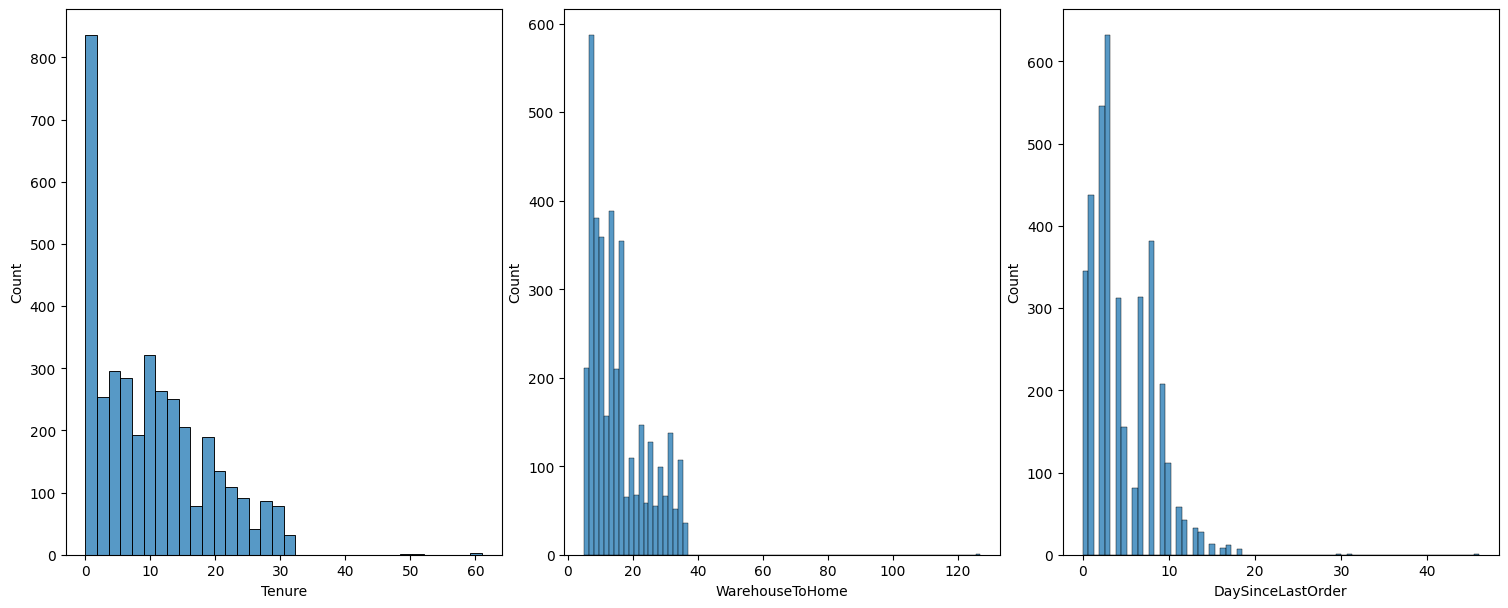

In [16]:
fig, axs = plt.subplots(1,3,figsize=(15,6))
index = 0
axs = axs.flatten()

for k,v in churnTMP[['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']].items():
    sns.histplot(x=k, data=churnTMP, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

**Insight :**

- On missing values checking, it was found that some data was missing in the dataset.

- The missing values in the data are in the `Tenure, WarehouseToHome, and DaySinceLastOrder` variables, where the missing values in the data is about `14.62%`.

- After carrying out further identification, `there was no pattern` in the missing values.

- Looking at the histogram graph created, the data on this variable is `not normally distributed` where the histogram graph is `right-skewed`.

### Duplicated Value

In [17]:
churnTMP.duplicated().sum()

671

In [18]:
((churnTMP.duplicated().sum() / len(churnTMP))*100).round(2)

17.03

In [19]:
churnTMP = churnTMP.drop_duplicates()

**Insight :**

- On duplicated values checking, it was found that some data have duplicated, where the duplicated values is about `17.03%` from total data. 

### Outlier

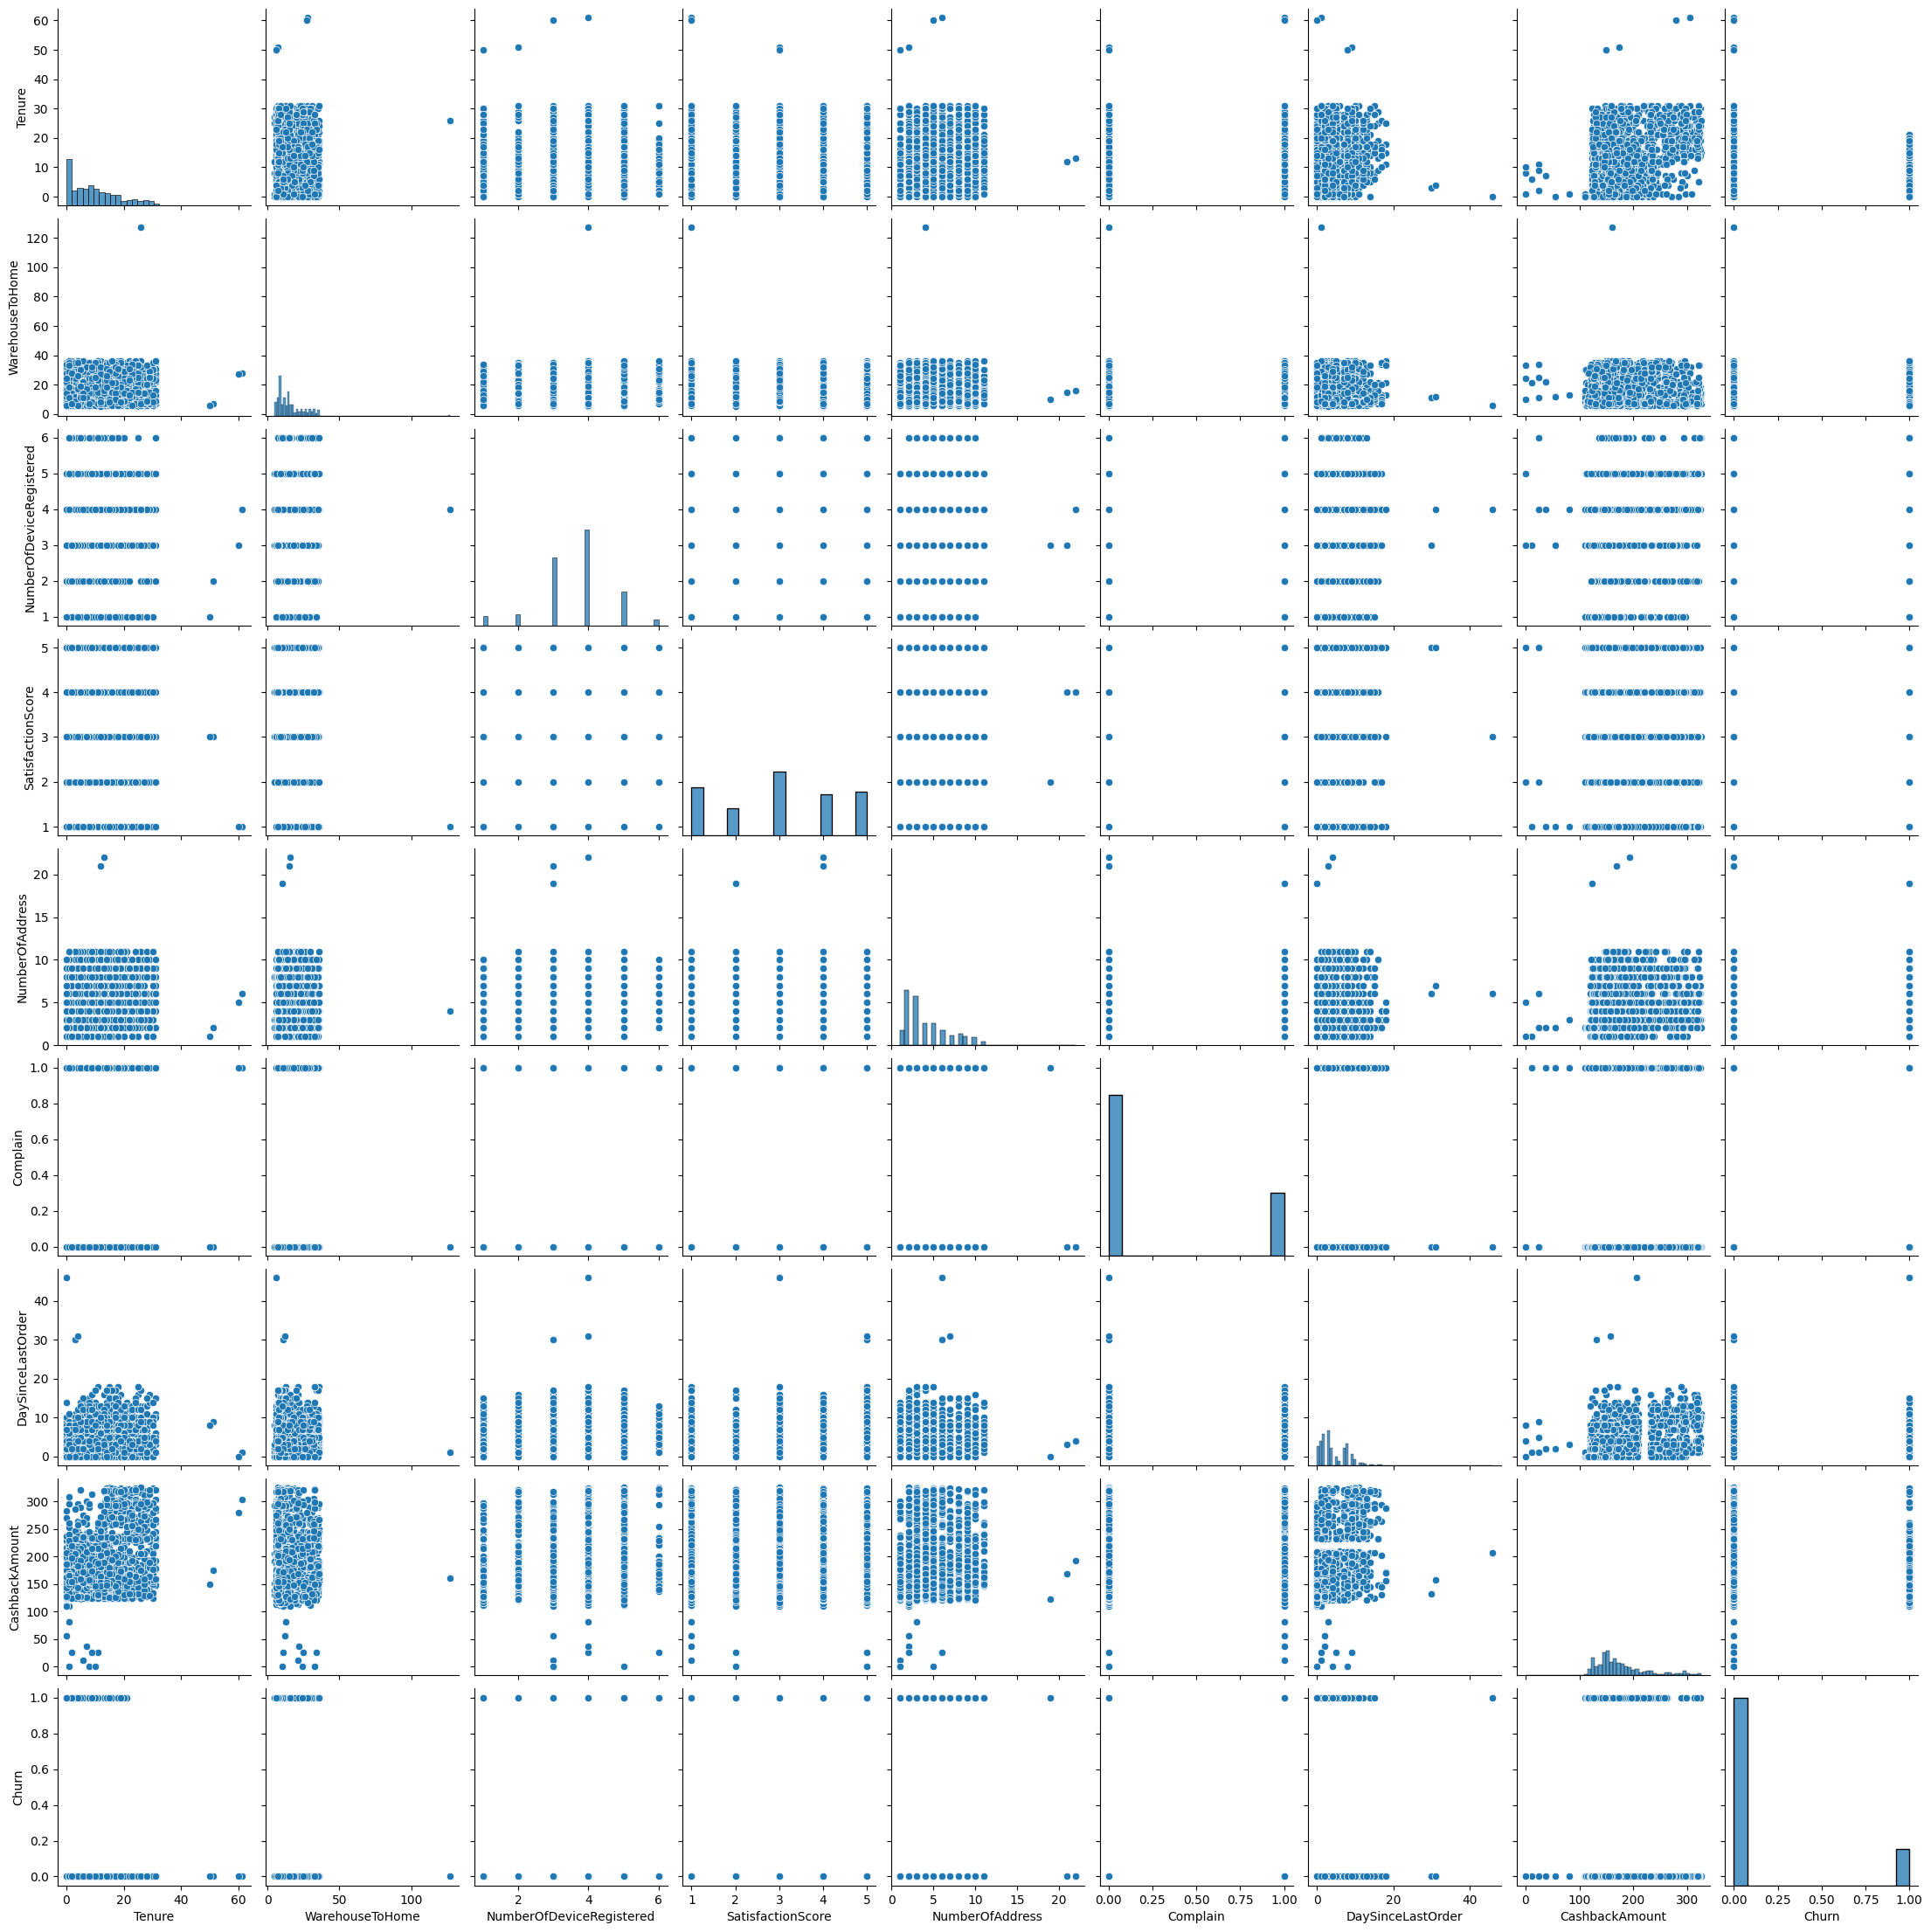

In [20]:
sns.pairplot(churnTMP)

In [21]:
# Check Outlier

def outlier(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    
    return upper, lower

In [22]:
column = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
          'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 
          'CashbackAmount']

for col in column:
    upper, lower = outlier(churnTMP[col])
    print("Outlier Total", col, ":", 
          len(churnTMP[(churnTMP[col] > upper) | (churnTMP[col] < lower)])
          )
    print("Outlier Percentage", col, ":", 
          round((len(churnTMP[(churnTMP[col] > upper) | (churnTMP[col] < lower)]) / len(churnTMP))*100, 2)
          )
    display(pd.DataFrame(churnTMP[(churnTMP[col] > upper) | (churnTMP[col] < lower)]))
    print()


Outlier Total Tenure : 4
Outlier Percentage Tenure : 0.12


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
51,61.0,28.0,4,Grocery,1,Married,6,1,1.0,303.75,0
449,51.0,7.0,2,Laptop & Accessory,3,Divorced,2,0,9.0,174.00,0
1209,60.0,27.0,3,Grocery,1,Married,5,1,0.0,278.75,0
3778,50.0,6.0,1,Laptop & Accessory,3,Divorced,1,0,8.0,149.00,0



Outlier Total WarehouseToHome : 1
Outlier Percentage WarehouseToHome : 0.03


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
2717,26.0,127.0,4,Mobile Phone,1,Married,4,0,1.0,159.82,0



Outlier Total NumberOfDeviceRegistered : 226
Outlier Percentage NumberOfDeviceRegistered : 6.91


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
6,1.0,15.0,6,Mobile Phone,5,Divorced,3,0,2.0,149.51,0
10,6.0,26.0,6,Fashion,3,Married,5,0,NaN,221.10,0
19,0.0,18.0,1,Mobile,4,Single,2,0,0.0,127.16,1
22,30.0,9.0,1,Mobile,5,Married,5,1,0.0,126.70,0
27,0.0,NaN,1,Mobile,3,Single,4,1,3.0,124.32,1
...,...,...,...,...,...,...,...,...,...,...,...
3871,7.0,NaN,1,Mobile,3,Married,1,0,0.0,125.85,0
3875,18.0,6.0,1,Others,1,Married,1,0,7.0,292.02,0
3887,16.0,36.0,6,Laptop & Accessory,1,Single,6,0,1.0,167.72,0
3914,17.0,10.0,1,Others,5,Married,2,0,13.0,291.90,0



Outlier Total SatisfactionScore : 0
Outlier Percentage SatisfactionScore : 0.0


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn



Outlier Total NumberOfAddress : 3
Outlier Percentage NumberOfAddress : 0.09


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
1581,NaN,10.0,3,Mobile,2,Single,19,1,0.0,122.85,1
2109,13.0,16.0,4,Laptop & Accessory,4,Single,22,0,4.0,192.82,0
3494,12.0,15.0,3,Laptop & Accessory,4,Single,21,0,3.0,167.82,0



Outlier Total DaySinceLastOrder : 40
Outlier Percentage DaySinceLastOrder : 1.22


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
169,17.0,34.0,3,Grocery,5,Divorced,4,0,17.0,263.28,0
181,3.0,11.0,3,Mobile,5,Married,6,0,30.0,132.04,0
235,18.0,35.0,4,Grocery,5,Married,5,0,18.0,288.28,0
256,29.0,21.0,2,Others,4,Single,10,0,16.0,312.22,0
486,13.0,7.0,3,Grocery,5,Married,3,0,16.0,268.23,0
547,16.0,11.0,4,Others,2,Divorced,3,0,16.0,317.32,0
739,25.0,9.0,4,Grocery,5,Divorced,2,0,16.0,268.56,0
800,15.0,13.0,4,Mobile Phone,5,Single,4,1,18.0,172.21,0
891,17.0,13.0,4,Fashion,1,Married,4,0,17.0,202.48,0
1339,14.0,12.0,3,Mobile Phone,5,Single,3,1,17.0,147.21,0



Outlier Total CashbackAmount : 253
Outlier Percentage CashbackAmount : 7.74


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
43,17.0,21.0,4,Grocery,5,Married,8,0,1.0,296.59,0
51,61.0,28.0,4,Grocery,1,Married,6,1,1.0,303.75,0
101,19.0,21.0,3,Others,4,Married,6,0,3.0,290.81,0
104,15.0,9.0,4,Grocery,5,Divorced,9,0,9.0,290.95,0
...,...,...,...,...,...,...,...,...,...,...,...
3860,17.0,21.0,4,Grocery,5,Divorced,8,0,1.0,296.59,0
3867,13.0,16.0,4,Others,1,Single,4,0,4.0,319.31,0
3875,18.0,6.0,1,Others,1,Married,1,0,7.0,292.02,0
3914,17.0,10.0,1,Others,5,Married,2,0,13.0,291.90,0


In [23]:
churnTMP.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3110.000000,3135.000000,3270.000000,3270.000000,3270.000000,3270.000000,3089.000000,3270.000000,3270.000000
mean,10.190354,15.510367,3.676453,3.020795,4.222936,0.281651,4.545484,177.417670,0.163303
std,8.650821,8.568382,1.017390,1.395113,2.623195,0.449873,3.696022,49.310647,0.369698
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.892500,0.000000
50%,9.000000,13.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.885000,0.000000
75%,16.000000,20.000000,4.000000,4.000000,6.000000,1.000000,7.000000,197.137500,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


In [24]:
churnTMP.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn'],
      dtype='object')

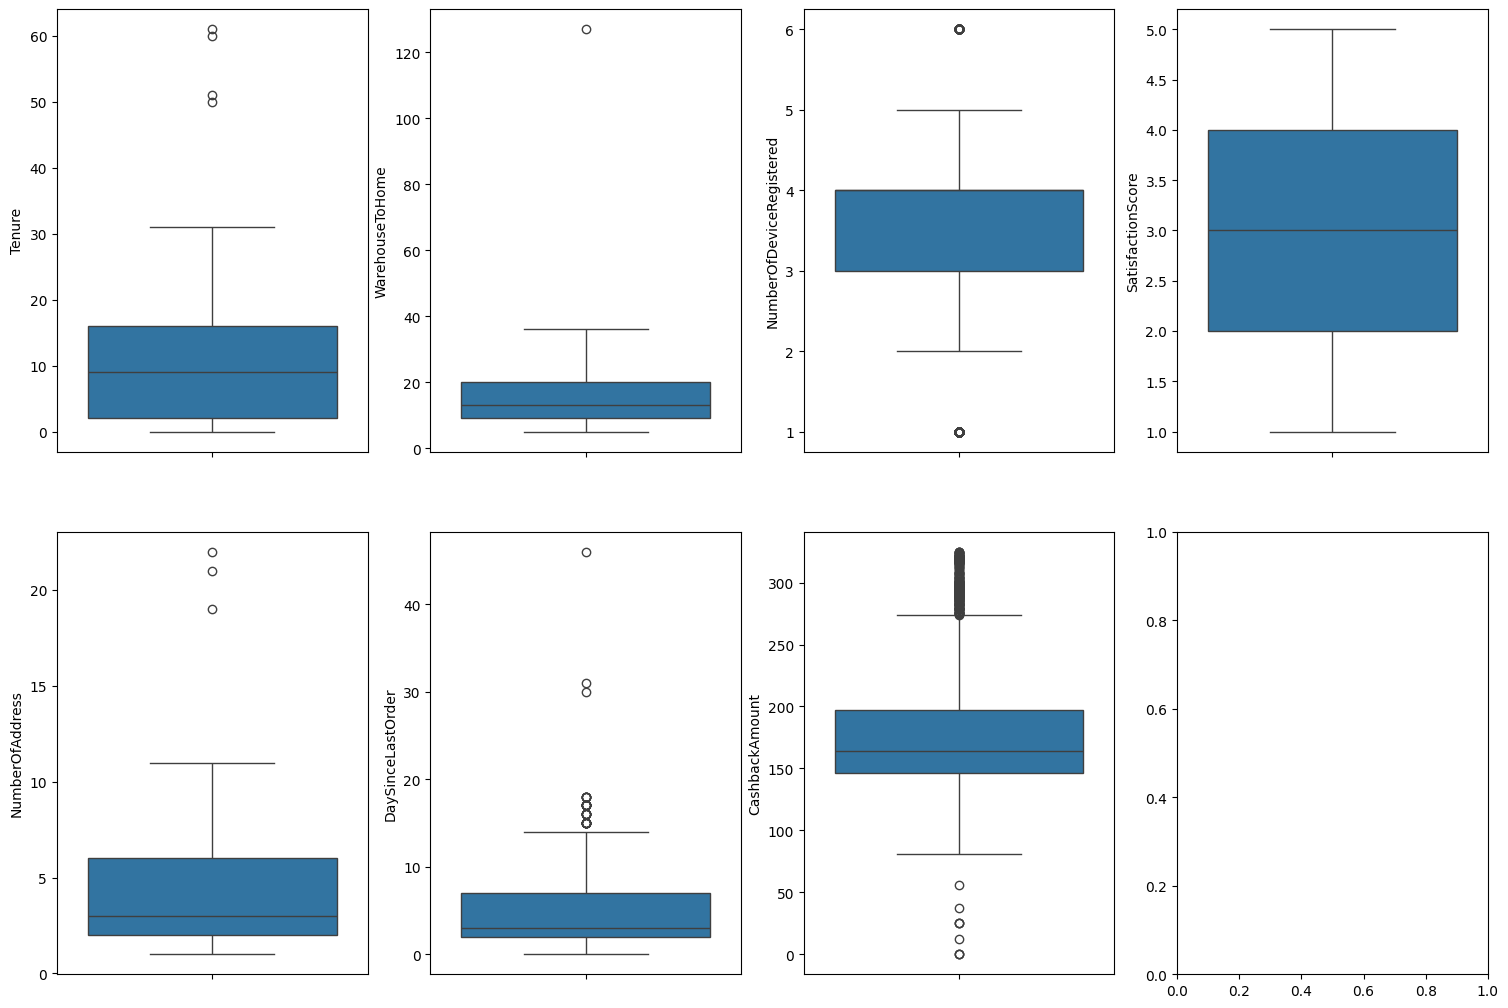

In [25]:
fig, axs = plt.subplots(2,4,  figsize=(15, 10))
index = 0
axs = axs.flatten()

for k,v in churnTMP[column].items():
    sns.boxplot(y=k, data=churnTMP, ax=axs[index])
    if index > len(column):
        break
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [26]:
churnTMP[column].describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,DaySinceLastOrder,CashbackAmount
count,3110.000000,3135.000000,3270.000000,3270.000000,3270.000000,3089.000000,3270.000000
mean,10.190354,15.510367,3.676453,3.020795,4.222936,4.545484,177.417670
std,8.650821,8.568382,1.017390,1.395113,2.623195,3.696022,49.310647
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,2.000000,145.892500
50%,9.000000,13.000000,4.000000,3.000000,3.000000,3.000000,163.885000
75%,16.000000,20.000000,4.000000,4.000000,6.000000,7.000000,197.137500
max,61.000000,127.000000,6.000000,5.000000,22.000000,46.000000,324.990000


**Insight :**

- On outliers values checking, it was found that the dataset `have multiple outlier`, where the `pattern can't be identified` after further identification.

- Outliers can be classified as `global outliers` due to extreme data deviations where the deviations are not related to any context and do not appear in groups at the time of data collection.

## Insight Analysis

After conducting data exploration on `uncleaned data`, there are several points that can be taken regarding the customer churn dataset to provide insight into data preprocessing for machine learning. Following is an explanation of the points earned:

### **Input Correction**
- When checking the data type for each variable in the dataset, there are 11 variables, of which `9 variables` have a `numeric` data type and `2 variables` have an `object` data type.

- Numeric data in this dataset are Tenure, WarehouseToHome, NumberOfDeviceRegistered, SatisfactionScore, NumberOfAddress, Complain,
DaySinceLastOrder, and CashbackAmount

- Object data in this dataset are PreferedOrderCat and MaritalStatus

- In the dataset there is data that is in ordinal form, namely `SatisfactionScore`. Also, in the dataset there is also data that is in nominal form, namely `Complaint and Churn`. These variables are already in numerical form so there is `no need for a scaling or encoding process` for these two variables especially for Churn because it will become target fot this machine learning

- When checking the unique data on the object data type the following results are obtained: 
    - There are a total of `6 unique values` for PreferredOrderCat namely **['Laptop & Accessories', 'Mobile Phones', 'Fashion', 'Others', 'Mobile Phones', 'Shop grocery']**
    - There are a total of `3 unique values` for MaritalStatus namely **[Single, Married, Divorced]**
    
    So `encoding process is needed` to convert these value into numeric so that it can be processed by machine learning

- When checking unique data on the numeric data type the following results are obtained:
    - There are `various numbers` of unique values for each variable in numeric type data
    - Each variable has a `varying range` of values
    
    So it can be concluded that a `scaling process may need to be carried out` in the preprocessing model to equalize the range of values on each variables.<br> 
- For **Tenure, WarehouseToHome, DaySinceLastOrder, CashbackAmount** can be binned into category variables. The following are the binning possibilities that can be done:

    - `Tenure`: New customer, Mid-stage customer, Long-term customer
    
    - `WarehouseToHome`: Near, Moderate, Far

    - `DaySinceLastOrder`: Recent, Mid-term, Distant
    
    - `CashbackAmount`: Small Cashback, Medium Cashback, Large Cashback

### **Anomalies Handling**
- When checking the missing values in dataset the following results are obtained: 
    
    - On missing values checking, it was found that some data was missing in the dataset.
    
    - The missing values in the data are in the `Tenure, WarehouseToHome, and DaySinceLastOrder` variables, where the missing values in the data is about `14.62%`.
    
    - After carrying out further identification, `there was no pattern` in the missing values.
    
    - Looking at the histogram graph created, the data on this variable is `not normally distributed` where the histogram graph is `right-skewed`.
    
    So, for this case of missing values, `impute process is needed` to fill in the missing values where the appropriate impute value used to fill in the empty values for the variable is `median`

- When checking the duplicated values in dataset the following results are obtained: 

    - On duplicated values checking, it was found that some data have duplicated, where the duplicated values is about `17.03%` from total data. 
    
    So it is necessary to `drop` on the duplicate data because these data can add the weights of samples and can cause bias.

- When checking the missing values in dataset the following results are obtained:

    - On outliers values checking, it was found that the dataset `have multiple outlier`, where the `pattern can't be identified` after further identification.

    - Outliers can be classified as `global outliers` due to extreme data deviations where the deviations are not related to any context and do not appear in groups at the time of data collection.

    For outliers handling, it will be `left` so that the machine learning created has a robust model when it gets outlier input in the future and the machine learning created is classification. So that models that can be used are models that have a `basic tree` such as a `Decision Tree` or `ensemble models with Decision Tree estimators` such as `Random Forest and Boosting`. Apart from that, we can also use `SVC or KNN`.

# # Exploratory Data Analysis (Cleaned)

In [27]:
churnCL = churnTMP

In [28]:
churnCL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3270 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3110 non-null   float64
 1   WarehouseToHome           3135 non-null   float64
 2   NumberOfDeviceRegistered  3270 non-null   int64  
 3   PreferedOrderCat          3270 non-null   object 
 4   SatisfactionScore         3270 non-null   int64  
 5   MaritalStatus             3270 non-null   object 
 6   NumberOfAddress           3270 non-null   int64  
 7   Complain                  3270 non-null   int64  
 8   DaySinceLastOrder         3089 non-null   float64
 9   CashbackAmount            3270 non-null   float64
 10  Churn                     3270 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 306.6+ KB


In [29]:
churnCL

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3933,25.0,15.0,5,Fashion,4,Married,7,0,8.0,249.90,0
3935,26.0,7.0,4,Grocery,1,Married,4,0,9.0,295.99,0
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0


## Adding Feature

In [30]:
churnCL.describe().loc['max', :] - churnCL.describe().loc['min', :]

Tenure                       61.00
WarehouseToHome             122.00
NumberOfDeviceRegistered      5.00
SatisfactionScore             4.00
NumberOfAddress              21.00
Complain                      1.00
DaySinceLastOrder            46.00
CashbackAmount              324.99
Churn                         1.00
dtype: float64

In [31]:
churnCL['Tenure'].unique()

array([15.,  7., 27., 20., 30.,  1., 11., 17.,  6., 16., 10., nan,  8.,
       19.,  0.,  3.,  5.,  9., 18., 12., 24.,  4., 61., 25., 13., 14.,
        2., 21., 29., 26., 23., 31., 22., 28., 51., 60., 50.])

In [32]:
churnCL['WarehouseToHome'].unique()

array([ 29.,  25.,  13.,  15.,  16.,  11.,  12.,   7.,  26.,  20.,  14.,
         8.,  21.,  22.,  27.,  18.,  33.,   9.,  17.,  nan,   6.,  31.,
        28.,  10.,  19.,  32.,  23.,  30.,  35.,  34.,  24.,   5.,  36.,
       127.])

In [33]:
churnCL['DaySinceLastOrder'].unique()

array([ 7., nan,  8., 11.,  2.,  1.,  4.,  3.,  6.,  0., 14.,  9., 10.,
       12.,  5., 17., 30., 18., 16., 13., 15., 46., 31.])

In [34]:
churnCL['CashbackAmount'].unique()

array([143.32, 129.29, 168.54, ..., 147.66, 231.86, 153.73])

### Categorizing

In [35]:
# col = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAMount']

churnCL['TenureCat'] = pd.cut(x=churnCL['Tenure'],
                              bins=[0, 21, 41, 62],
                              right=False,
                              labels=['New', 'Mid-stage', 'Long-term'])
churnCL['WarehouseToHomeCat'] = pd.cut(x=churnCL['WarehouseToHome'],
                                       bins=[0, 13, 25, 123],
                                       right=False,
                                       labels=['Near', 'Moderate', 'Far'])
churnCL['DaySinceLastOrderCat'] = pd.cut(x=churnCL['DaySinceLastOrder'],
                                         bins=[0, 16, 31, 47],
                                         right=False,
                                         labels=['Recent', 'Mid-term', 'Distant'])
churnCL['CashbackAMountCat'] = pd.cut(x=churnCL['CashbackAmount'],
                                      bins=[0, 108, 217, 326],
                                      right=False,
                                      labels=['Small', 'Medium', 'Large'])
churnCL.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,TenureCat,WarehouseToHomeCat,DaySinceLastOrderCat,CashbackAMountCat
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0,New,Far,Recent,Medium
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0,New,Far,Recent,Medium
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0,Mid-stage,Moderate,Recent,Medium
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0,New,Far,NaN,Large
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0,Mid-stage,Moderate,Recent,Large


**Insight:**
- Looking at the results of the previous insight analysis, we can do binning on several variables. These variables are changed into three categories according to the domain knowledge of each variable

In [36]:
# ordinal_mapping = [
#     {'col':'TenureCat',
#     'mapping':{None:0,'New':1,'Mid-stage':2,'Long-term':3}},
#     {'col': 'WarehouseToHomeCat',
#     'mapping':{None:0,'Near':1,'Moderate':2,'Far':3}},
#     {'col': 'DaySinceLastOrderCat',
#     'mapping':{None:0,'Recent':1,'Mid-term':2,'Distant':3}},
#     {'col': 'CashbackAMountCat',
#     'mapping':{None:0,'Small':1,'Medium':2,'Large':3}},
#     ]

# ordinal = ce.OrdinalEncoder(cols=['TenureCat', 'WarehouseToHomeCat', 'DaySinceLastOrderCat', 'CashbackAMountCat'], mapping=ordinal_mapping)
# ordinal.fit_transform(churnCL)

## Variable Dependencies and Correlation

In [37]:
catVar = churnCL[['PreferedOrderCat', 'MaritalStatus', 'TenureCat', 'WarehouseToHomeCat', 'DaySinceLastOrderCat', 'CashbackAMountCat', 'Churn']]
xtab_list = []
xtab_name = []

for col in catVar.iloc[:, 0:6].columns:
    print(col)
    xtab = pd.crosstab(catVar[col], catVar['Churn'])
    xtab_name.append(col)
    xtab_list.append(xtab)
    display(xtab)

PreferedOrderCat


Churn,0,1
PreferedOrderCat,,
Fashion,409,75
Grocery,231,10
Laptop & Accessory,1094,119
Mobile,334,124
Mobile Phone,530,195
Others,138,11


MaritalStatus


Churn,0,1
MaritalStatus,,
Divorced,487,89
Married,1502,184
Single,747,261


TenureCat


Churn,0,1
TenureCat,,
New,2190,482
Mid-stage,430,4
Long-term,4,0


WarehouseToHomeCat


Churn,0,1
WarehouseToHomeCat,,
Near,1253,198
Moderate,936,175
Far,456,116


DaySinceLastOrderCat


Churn,0,1
DaySinceLastOrderCat,,
Recent,2558,503
Mid-term,26,0
Distant,1,1


CashbackAMountCat


Churn,0,1
CashbackAMountCat,,
Small,10,0
Medium,2178,483
Large,548,51


In [38]:
n=0
print(
'''
H0: The variable of test is independent
Ha: The variable of test is dependent
'''
)
for tab in xtab_list:
    stats, pvalue, dof, expected = chi2_contingency(tab)
    
    print(f'Churn to {xtab_name[n]}')
    n+=1
    print(f'pValue = {pvalue}')
    if pvalue >= 0.05:
        print(
'''
P-value >= 0.05, then we DO NOT have strong enough evidence to reject H0.
So each variable in this test is independent
'''
        )
    else:
        print(
'''
P-value < 0.05, then we have strong enough evidence to reject H0.
So each variable in this test is dependent
'''
        )


H0: The variable of test is independent
Ha: The variable of test is dependent

Churn to PreferedOrderCat
pValue = 4.877656342601032e-35

P-value < 0.05, then we have strong enough evidence to reject H0.
So each variable in this test is dependent

Churn to MaritalStatus
pValue = 2.6193536426851933e-23

P-value < 0.05, then we have strong enough evidence to reject H0.
So each variable in this test is dependent

Churn to TenureCat
pValue = 6.645127545824858e-19

P-value < 0.05, then we have strong enough evidence to reject H0.
So each variable in this test is dependent

Churn to WarehouseToHomeCat
pValue = 0.0010384453113728577

P-value < 0.05, then we have strong enough evidence to reject H0.
So each variable in this test is dependent

Churn to DaySinceLastOrderCat
pValue = 0.034018809794385714

P-value < 0.05, then we have strong enough evidence to reject H0.
So each variable in this test is dependent

Churn to CashbackAMountCat
pValue = 2.2829665283547226e-08

P-value < 0.05, then we 

**Insight :**

- In the chi2 test, it is found that several categorical feature variables are dependent to  variable that can be used as a label

- Variables that have dependencies on the target variable are `PreferedOrderCat, MaritalStatus, TenureCat, DaySinceLastOrderCat, CashbackAMountCat, WarehouseToHomeCat`. 

<AxesSubplot: >

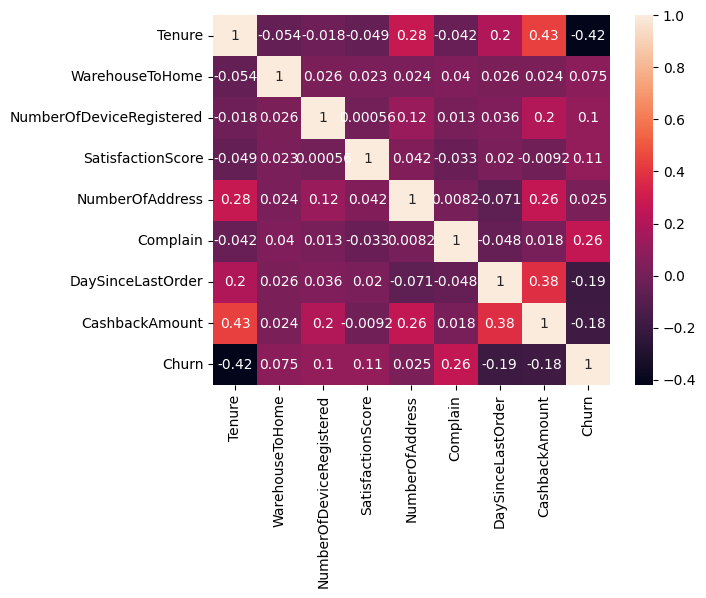

In [39]:
num_corr = numClass.corr(method='spearman')

sns.heatmap(num_corr, annot=True)

**Insight :**

- Looking at the heatmap graph obtained after carrying out the correlation test, the correlation values between variables are obtained. In this graph there are several variables that have quite `high correlation values` with the target variable

- Tenure variable has the highest correlation value with the target variable among other feature variables where this variable has a value of `-0.42`

- NumberOfAddress variable has the lowest correlation value with the target variable among other feature variables where this variable has a value of `0.025`

### Checking if the data is balanced or not

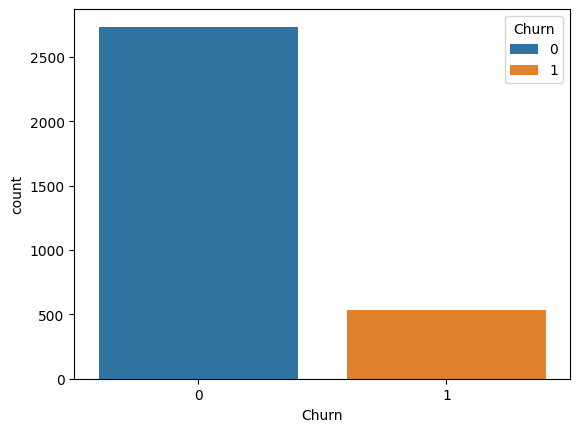

In [40]:
sns.countplot(data=churnCL, x='Churn', hue='Churn');

**Insight :**

- From the bar plot graph that has been created, it can be seen that the target variable has an `imbalanced` proportion

## Insight Analysis

After conducting data exploration on `clean data`, there are several points that can be taken regarding the customer churn dataset to provide insight into data preprocessing for machine learning. Following is an explanation of the points earned:

- After doing chi2 test to check categorical variabel depencencies, the following results are obtained:
    - It is found that several categorical feature variables are dependent to  variable that can be used as a label

    - Variables that have dependencies on the target variable are `PreferedOrderCat, MaritalStatus, TenureCat, DaySinceLastOrderCat, CashbackAMountCat, WarehouseToHomeCat`.

    So from the results of the chi2 test it can be seen that these categorical variables `can be used as features` for machine learning preprocessing

- After doing correlation test to check numerical variabel depencencies, the following results are obtained:
    - Looking at the heatmap graph obtained after carrying out the correlation test, the correlation values between variables are obtained. In this graph there are several variables that have quite `high correlation values` with the target variable

    - Tenure variable has the highest correlation value with the target variable among other feature variables where this variable has a value of `-0.42`

    - NumberOfAddress variable has the lowest correlation value with the target variable among other feature variables where this variable has a value of `0.025`

    So from the results of the correlation test it can be seen that these numerical variables `can be used as features` for machine learning preprocessing. However, it is important to remember that there is a possibility that variables that have `low correlation values will produce poor score` results during model evaluation

- After checking data proportion of target variable, the results obtained are the proportion of values in the target is `imbalance`. So in preprocessing we can add `sampling or class weights` to balance the proportions of the target variables

# # Data Preparation and Feature Engineering

After exploring the data, the next step is to preprocess the data on the features that will be used in machine learning. Data preprocessing is a necessary stage in machine learning to ensure that the data is of `high quality and suitable for analysis`. By addressing data quality issues, transforming data into a suitable format, and improving data consistency, `data preprocessing can significantly improve` the performance, generalizability, and interpretability of machine learning models

At this initial stage, `all features available` in the dataset are `used` as consideration for the final score value of the machine learning results. Experimentation on the use of multiple features can be considered by using the results of correlation tests carried out previously in data exploration

In accordance with previous data exploration, the data preprocessing carried out is as follows :

## 1. Define Feature / Target

Divide the variables in the dataset into feature variables and target variables. This division is carried out to group the expected input and output in machine learning

In [41]:
feat = churnCL.drop(['Churn', 'TenureCat', 'WarehouseToHomeCat', 'DaySinceLastOrderCat', 'CashbackAMountCat'], axis=1)
target = churnCL['Churn']

print(feat.shape)
print(target.shape)

(3270, 10)
(3270,)


## 2. Train - Test Split

In [42]:
churnTMP = churn = pd.read_csv(r'E:\VA-Purwadhika\Capstone Project\Module 03 - Machine Learning\E-commerce Customers Churn\data_ecommerce_customer_churn.csv')
churn.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


# # Exploratory Data Analysis (Uncleaned)

## Input Correction

### Type Correction

In [43]:
churnTMP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


**Insight :**
- There are 11 variables, of which `9 variables` have a `numeric` data type and `2 variables` have an `object` data type.

- `Numeric data` in this dataset are **Tenure, WarehouseToHome, NumberOfDeviceRegistered, SatisfactionScore, NumberOfAddress, Complain,
DaySinceLastOrder, and CashbackAmount**
- `Object data` in this dataset are **PreferedOrderCat and MaritalStatus**

### Typo Correction

In [44]:
catClass = churnTMP.select_dtypes('object')
dfCat = pd.DataFrame({
    'Columns' : catClass.columns,
    'n-Unique' : [catClass[col].nunique() for col in catClass.columns],
    'Unique' : [catClass[col].unique() for col in catClass.columns]
})
dfCat

,Columns,n-Unique,Unique
0,PreferedOrderCat,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
1,MaritalStatus,3,"[Single, Married, Divorced]"


In [45]:
catClass['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Fashion', 'Others',
       'Mobile Phone', 'Grocery'], dtype=object)

In [46]:
numClass = churnTMP.select_dtypes('number')
dfNum = pd.DataFrame({
    'Columns' : numClass.columns,
    'n-Unique' : [numClass[col].nunique() for col in numClass.columns],
    'Unique' : [numClass[col].unique() for col in numClass.columns]
})
dfNum

,Columns,n-Unique,Unique
0,Tenure,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,6,"[4, 3, 6, 2, 5, 1]"
3,SatisfactionScore,5,"[3, 1, 4, 2, 5]"
4,NumberOfAddress,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
5,Complain,2,"[0, 1]"
6,DaySinceLastOrder,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
7,CashbackAmount,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."
8,Churn,2,"[0, 1]"


**Insight :**

- There are a total of `6 unique values` for PreferredOrderCat namely **['Laptop & Accessories', 'Mobile Phones', 'Fashion', 'Others', 'Mobile Phones', 'Shop grocery']**

- There are a total of `3 unique values` for MaritalStatus namely **[Single, Married, Divorced]**
- There are `various numbers` of unique values for each variable in numeric type data where each variable has a `varying range` of values

## Anomalies Handling

### Missing Value

In [47]:
churnTMP.isna().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

In [48]:
((churnTMP.isna().sum() / len(churnTMP))*100).round(2)

Tenure                      4.92
WarehouseToHome             4.29
NumberOfDeviceRegistered    0.00
PreferedOrderCat            0.00
SatisfactionScore           0.00
MaritalStatus               0.00
NumberOfAddress             0.00
Complain                    0.00
DaySinceLastOrder           5.40
CashbackAmount              0.00
Churn                       0.00
dtype: float64

In [49]:
((churnTMP.isna().any(axis=1).sum() / len(churnTMP))*100).round(2)

14.62

In [50]:
churnTMP[(churnTMP['Tenure'].isna())]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
16,NaN,21.0,5,Mobile,1,Married,1,1,3.0,121.68,0
37,NaN,6.0,4,Mobile,5,Married,2,0,2.0,122.18,0
44,NaN,7.0,4,Mobile,3,Married,2,0,0.0,120.08,0
85,NaN,6.0,3,Mobile,1,Married,4,0,2.0,122.70,0
93,NaN,15.0,3,Mobile,1,Married,4,0,3.0,120.75,0
...,...,...,...,...,...,...,...,...,...,...,...
3842,NaN,26.0,3,Mobile,3,Married,5,0,0.0,122.59,0
3853,NaN,28.0,3,Mobile Phone,3,Single,2,1,0.0,116.75,1
3879,NaN,16.0,3,Mobile,4,Married,2,0,2.0,122.97,0
3890,NaN,9.0,3,Mobile Phone,3,Single,2,0,0.0,114.20,1


In [51]:
churnTMP[(churnTMP['WarehouseToHome'].isna())]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
27,0.0,NaN,1,Mobile,3,Single,4,1,3.0,124.32,1
33,0.0,NaN,4,Mobile,4,Divorced,6,0,1.0,125.46,1
34,0.0,NaN,4,Mobile,1,Married,6,0,3.0,123.67,1
35,0.0,NaN,3,Mobile,5,Married,4,0,0.0,123.22,0
57,0.0,NaN,4,Mobile,4,Married,2,0,3.0,123.68,0
...,...,...,...,...,...,...,...,...,...,...,...
3871,7.0,NaN,1,Mobile,3,Married,1,0,0.0,125.85,0
3898,0.0,NaN,3,Mobile,3,Married,2,0,2.0,126.10,1
3900,0.0,NaN,4,Mobile,1,Single,2,1,0.0,124.39,1
3907,2.0,NaN,3,Mobile,5,Divorced,8,1,2.0,124.04,1


In [52]:
churnTMP[(churnTMP['DaySinceLastOrder'].isna())]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
10,6.0,26.0,6,Fashion,3,Married,5,0,NaN,221.10,0
13,1.0,7.0,5,Fashion,3,Divorced,7,0,NaN,231.09,1
29,1.0,17.0,5,Fashion,5,Married,11,0,NaN,228.06,1
52,16.0,9.0,4,Fashion,1,Married,4,1,NaN,226.24,0
...,...,...,...,...,...,...,...,...,...,...,...
3836,28.0,8.0,4,Fashion,3,Married,9,0,NaN,230.02,0
3843,13.0,7.0,2,Fashion,1,Married,2,0,NaN,221.13,0
3892,20.0,7.0,4,Fashion,5,Married,9,0,NaN,218.96,0
3894,9.0,24.0,4,Laptop & Accessory,5,Divorced,5,1,NaN,214.66,0


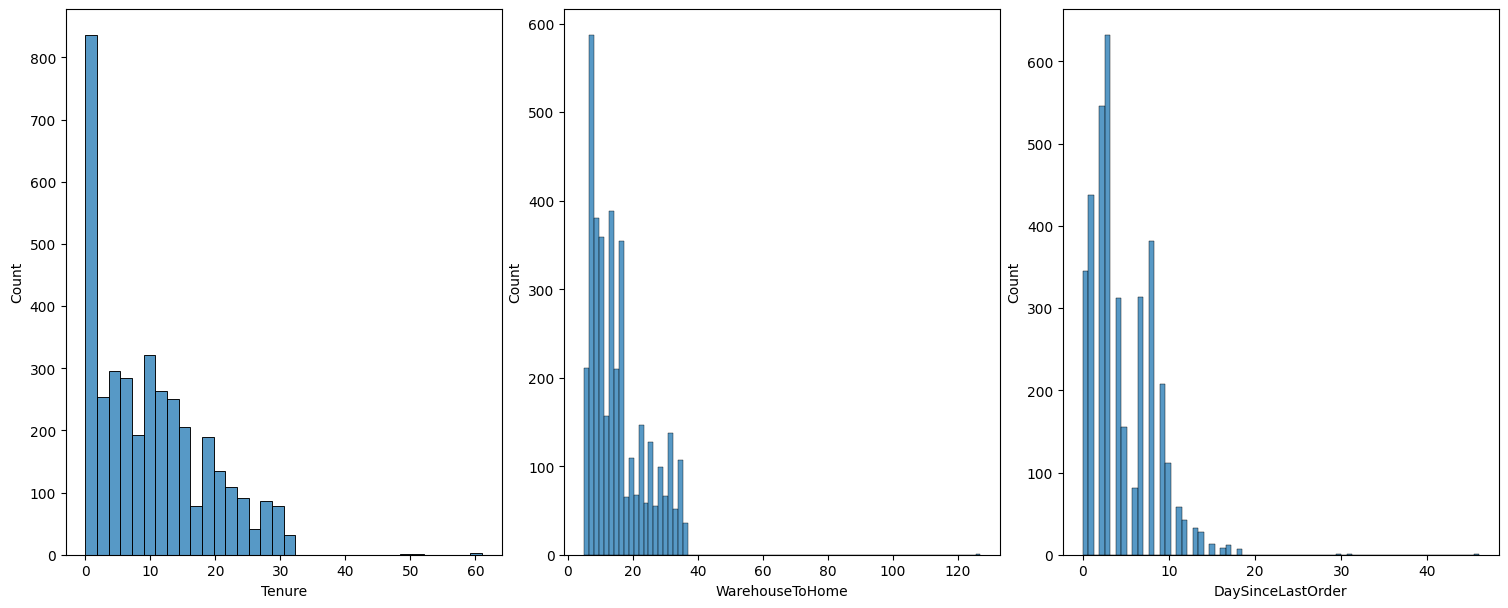

In [53]:
fig, axs = plt.subplots(1,3,figsize=(15,6))
index = 0
axs = axs.flatten()

for k,v in churnTMP[['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']].items():
    sns.histplot(x=k, data=churnTMP, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

**Insight :**

- On missing values checking, it was found that some data was missing in the dataset.

- The missing values in the data are in the `Tenure, WarehouseToHome, and DaySinceLastOrder` variables, where the missing values in the data is about `14.62%`.

- After carrying out further identification, `there was no pattern` in the missing values.

- Looking at the histogram graph created, the data on this variable is `not normally distributed` where the histogram graph is `right-skewed`.

### Duplicated Value

In [54]:
churnTMP.duplicated().sum()

671

In [55]:
((churnTMP.duplicated().sum() / len(churnTMP))*100).round(2)

17.03

In [56]:
churnTMP = churnTMP.drop_duplicates()

**Insight :**

- On duplicated values checking, it was found that some data have duplicated, where the duplicated values is about `17.03%` from total data. 

### Outlier

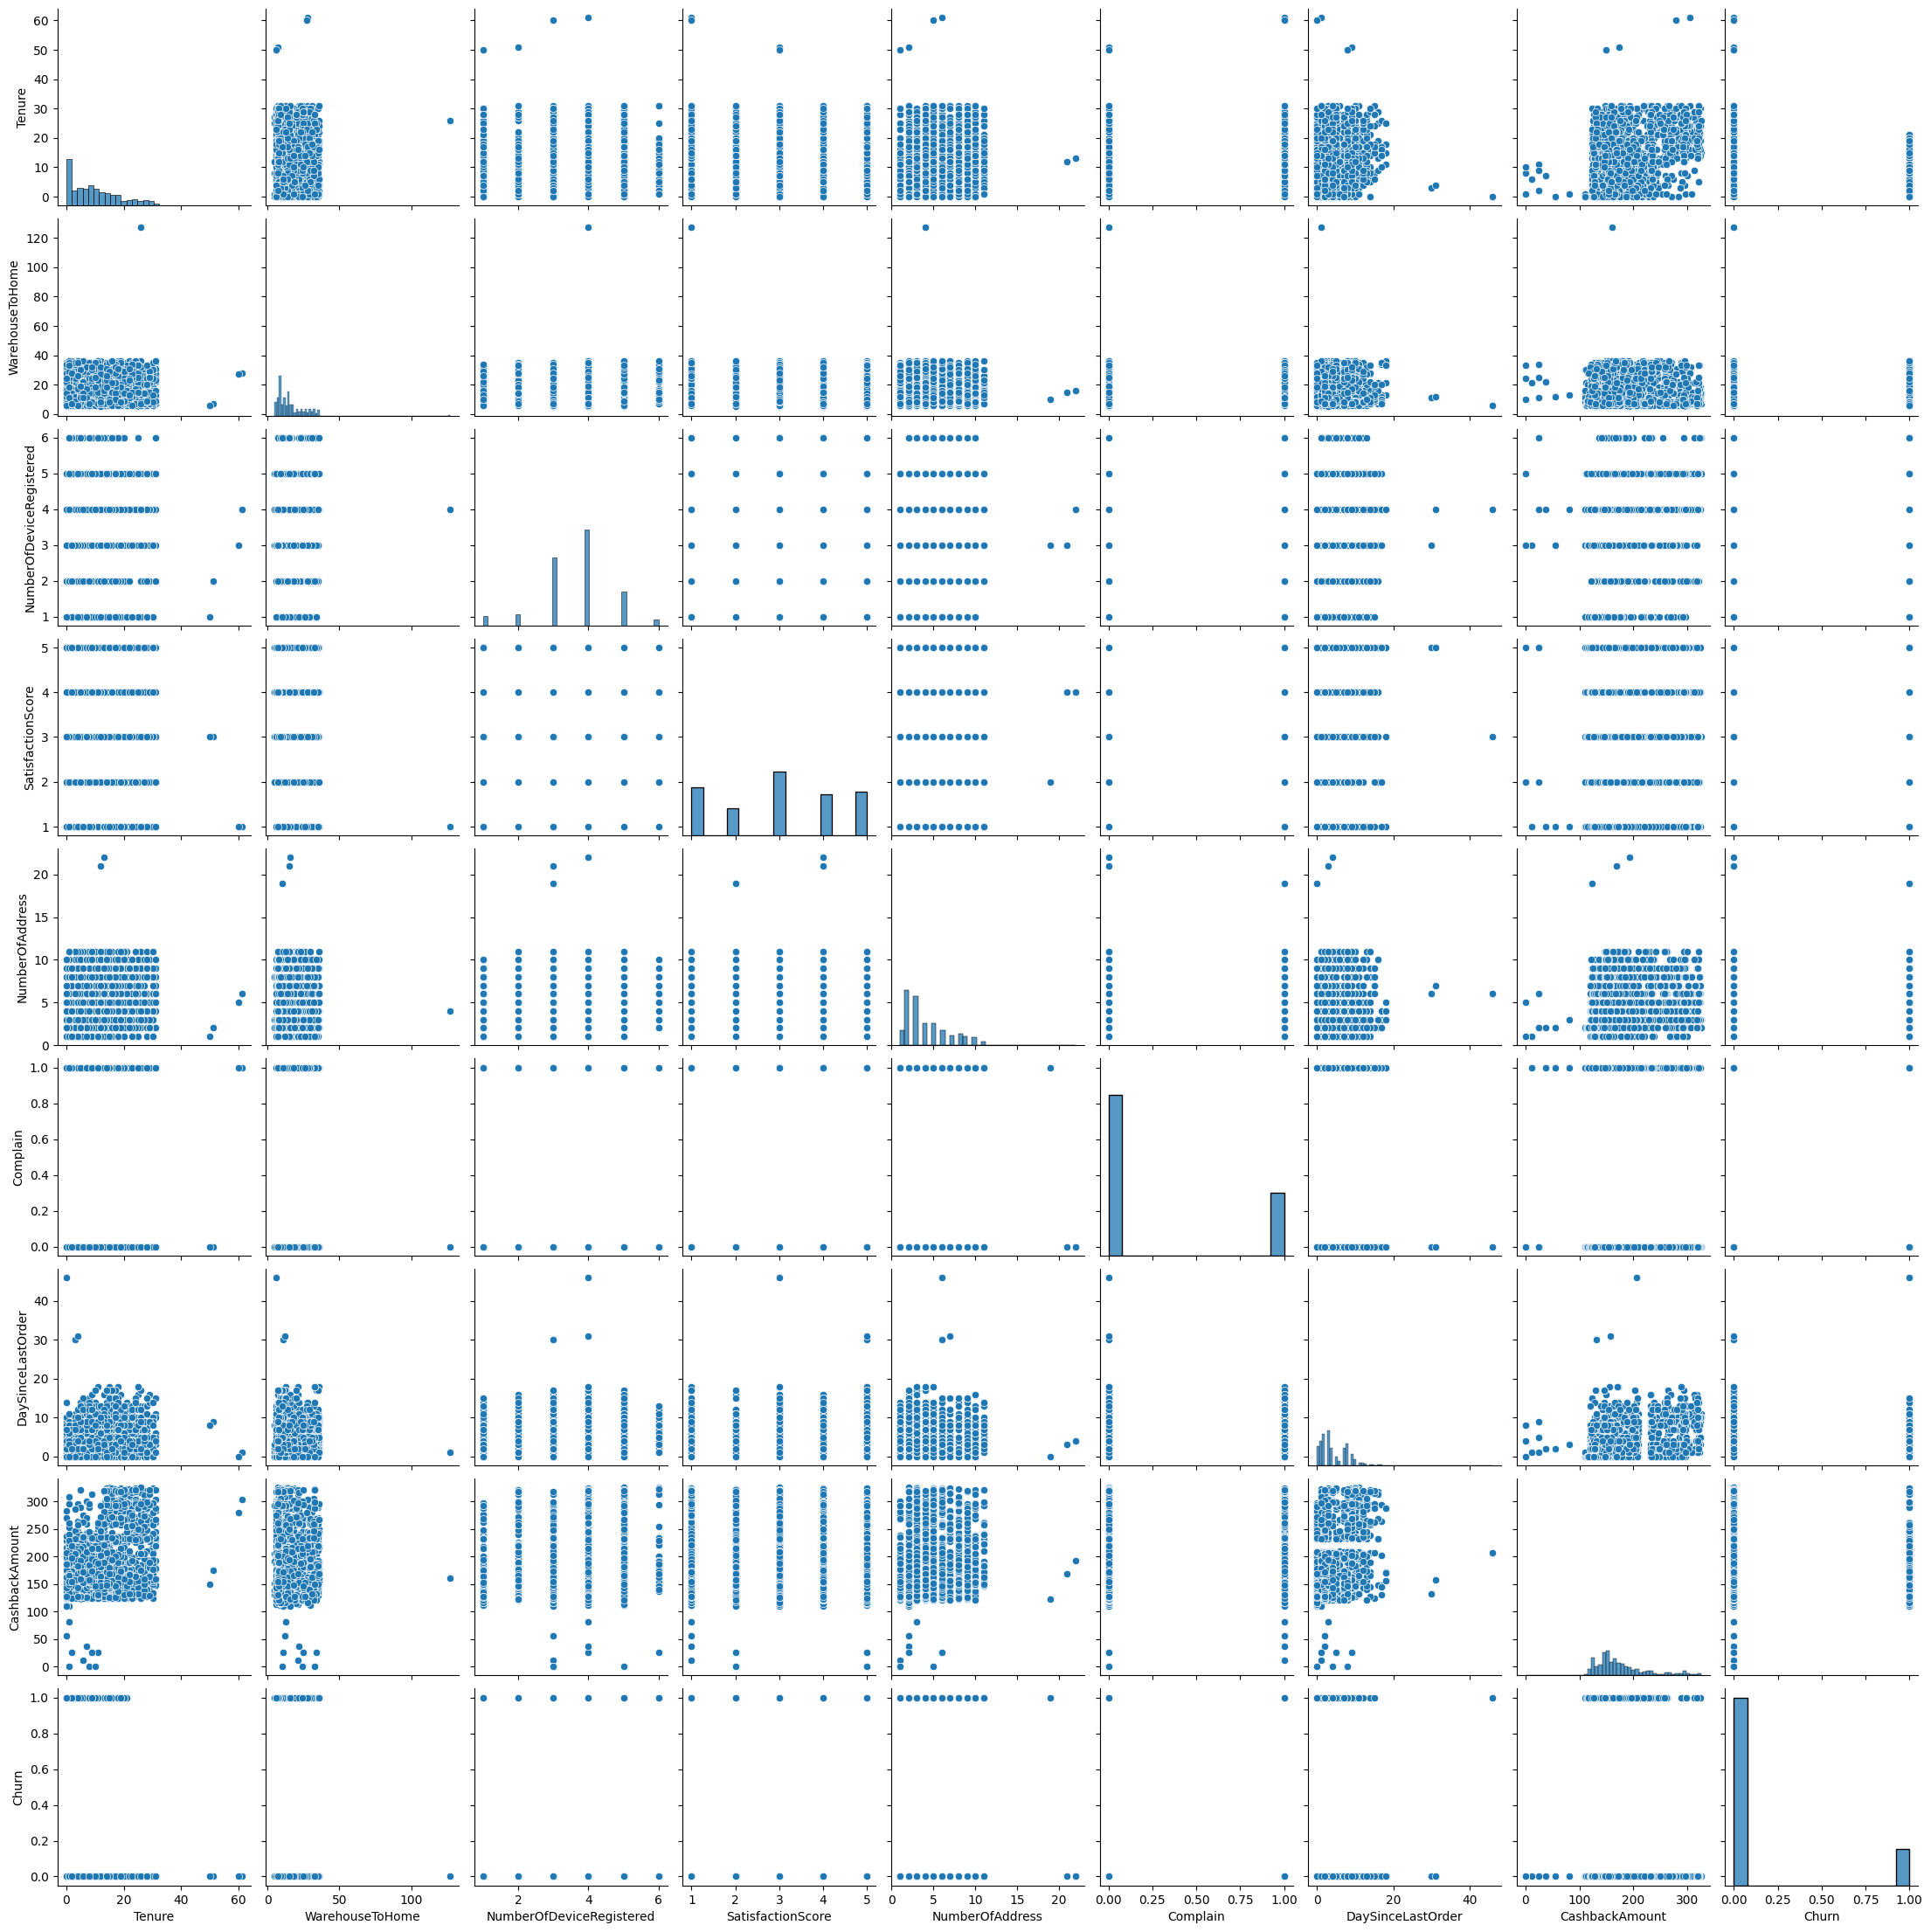

In [57]:
sns.pairplot(churnTMP)

In [58]:
# Check Outlier

def outlier(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    
    return upper, lower

In [59]:
column = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
          'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 
          'CashbackAmount']

for col in column:
    upper, lower = outlier(churnTMP[col])
    print("Outlier Total", col, ":", 
          len(churnTMP[(churnTMP[col] > upper) | (churnTMP[col] < lower)])
          )
    print("Outlier Percentage", col, ":", 
          round((len(churnTMP[(churnTMP[col] > upper) | (churnTMP[col] < lower)]) / len(churnTMP))*100, 2)
          )
    display(pd.DataFrame(churnTMP[(churnTMP[col] > upper) | (churnTMP[col] < lower)]))
    print()


Outlier Total Tenure : 4
Outlier Percentage Tenure : 0.12


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
51,61.0,28.0,4,Grocery,1,Married,6,1,1.0,303.75,0
449,51.0,7.0,2,Laptop & Accessory,3,Divorced,2,0,9.0,174.00,0
1209,60.0,27.0,3,Grocery,1,Married,5,1,0.0,278.75,0
3778,50.0,6.0,1,Laptop & Accessory,3,Divorced,1,0,8.0,149.00,0



Outlier Total WarehouseToHome : 1
Outlier Percentage WarehouseToHome : 0.03


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
2717,26.0,127.0,4,Mobile Phone,1,Married,4,0,1.0,159.82,0



Outlier Total NumberOfDeviceRegistered : 226
Outlier Percentage NumberOfDeviceRegistered : 6.91


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
6,1.0,15.0,6,Mobile Phone,5,Divorced,3,0,2.0,149.51,0
10,6.0,26.0,6,Fashion,3,Married,5,0,NaN,221.10,0
19,0.0,18.0,1,Mobile,4,Single,2,0,0.0,127.16,1
22,30.0,9.0,1,Mobile,5,Married,5,1,0.0,126.70,0
27,0.0,NaN,1,Mobile,3,Single,4,1,3.0,124.32,1
...,...,...,...,...,...,...,...,...,...,...,...
3871,7.0,NaN,1,Mobile,3,Married,1,0,0.0,125.85,0
3875,18.0,6.0,1,Others,1,Married,1,0,7.0,292.02,0
3887,16.0,36.0,6,Laptop & Accessory,1,Single,6,0,1.0,167.72,0
3914,17.0,10.0,1,Others,5,Married,2,0,13.0,291.90,0



Outlier Total SatisfactionScore : 0
Outlier Percentage SatisfactionScore : 0.0


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn



Outlier Total NumberOfAddress : 3
Outlier Percentage NumberOfAddress : 0.09


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
1581,NaN,10.0,3,Mobile,2,Single,19,1,0.0,122.85,1
2109,13.0,16.0,4,Laptop & Accessory,4,Single,22,0,4.0,192.82,0
3494,12.0,15.0,3,Laptop & Accessory,4,Single,21,0,3.0,167.82,0



Outlier Total DaySinceLastOrder : 40
Outlier Percentage DaySinceLastOrder : 1.22


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
169,17.0,34.0,3,Grocery,5,Divorced,4,0,17.0,263.28,0
181,3.0,11.0,3,Mobile,5,Married,6,0,30.0,132.04,0
235,18.0,35.0,4,Grocery,5,Married,5,0,18.0,288.28,0
256,29.0,21.0,2,Others,4,Single,10,0,16.0,312.22,0
486,13.0,7.0,3,Grocery,5,Married,3,0,16.0,268.23,0
547,16.0,11.0,4,Others,2,Divorced,3,0,16.0,317.32,0
739,25.0,9.0,4,Grocery,5,Divorced,2,0,16.0,268.56,0
800,15.0,13.0,4,Mobile Phone,5,Single,4,1,18.0,172.21,0
891,17.0,13.0,4,Fashion,1,Married,4,0,17.0,202.48,0
1339,14.0,12.0,3,Mobile Phone,5,Single,3,1,17.0,147.21,0



Outlier Total CashbackAmount : 253
Outlier Percentage CashbackAmount : 7.74


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
43,17.0,21.0,4,Grocery,5,Married,8,0,1.0,296.59,0
51,61.0,28.0,4,Grocery,1,Married,6,1,1.0,303.75,0
101,19.0,21.0,3,Others,4,Married,6,0,3.0,290.81,0
104,15.0,9.0,4,Grocery,5,Divorced,9,0,9.0,290.95,0
...,...,...,...,...,...,...,...,...,...,...,...
3860,17.0,21.0,4,Grocery,5,Divorced,8,0,1.0,296.59,0
3867,13.0,16.0,4,Others,1,Single,4,0,4.0,319.31,0
3875,18.0,6.0,1,Others,1,Married,1,0,7.0,292.02,0
3914,17.0,10.0,1,Others,5,Married,2,0,13.0,291.90,0


In [60]:
churnTMP.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3110.000000,3135.000000,3270.000000,3270.000000,3270.000000,3270.000000,3089.000000,3270.000000,3270.000000
mean,10.190354,15.510367,3.676453,3.020795,4.222936,0.281651,4.545484,177.417670,0.163303
std,8.650821,8.568382,1.017390,1.395113,2.623195,0.449873,3.696022,49.310647,0.369698
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.892500,0.000000
50%,9.000000,13.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.885000,0.000000
75%,16.000000,20.000000,4.000000,4.000000,6.000000,1.000000,7.000000,197.137500,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


In [61]:
churnTMP.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn'],
      dtype='object')

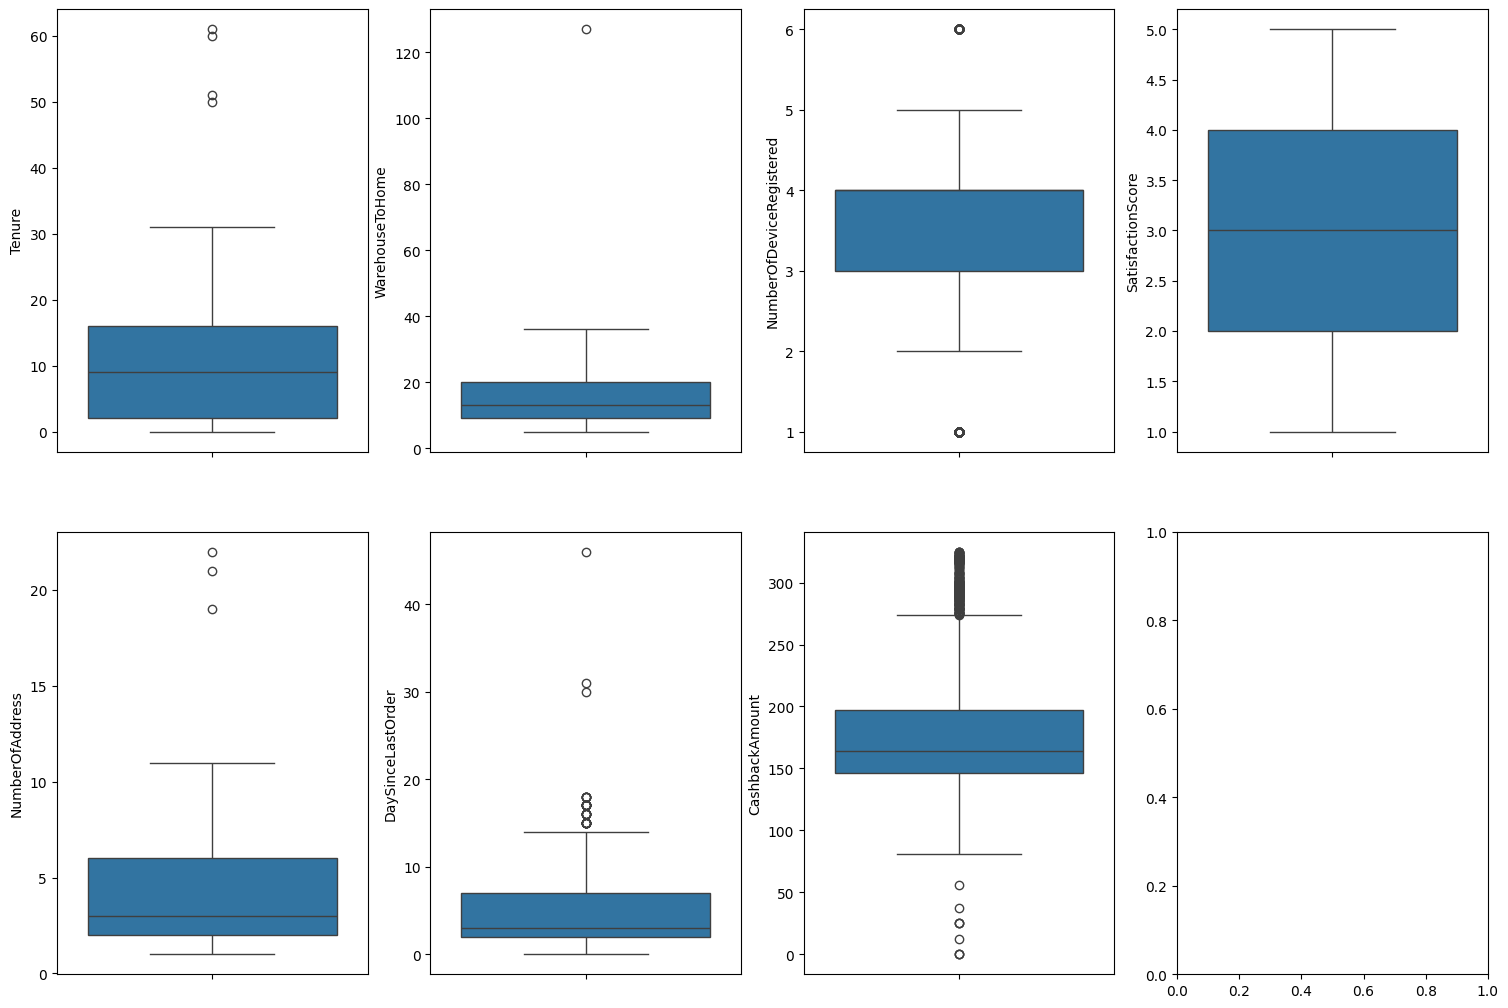

In [62]:
fig, axs = plt.subplots(2,4,  figsize=(15, 10))
index = 0
axs = axs.flatten()

for k,v in churnTMP[column].items():
    sns.boxplot(y=k, data=churnTMP, ax=axs[index])
    if index > len(column):
        break
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [63]:
churnTMP[column].describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,DaySinceLastOrder,CashbackAmount
count,3110.000000,3135.000000,3270.000000,3270.000000,3270.000000,3089.000000,3270.000000
mean,10.190354,15.510367,3.676453,3.020795,4.222936,4.545484,177.417670
std,8.650821,8.568382,1.017390,1.395113,2.623195,3.696022,49.310647
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,2.000000,145.892500
50%,9.000000,13.000000,4.000000,3.000000,3.000000,3.000000,163.885000
75%,16.000000,20.000000,4.000000,4.000000,6.000000,7.000000,197.137500
max,61.000000,127.000000,6.000000,5.000000,22.000000,46.000000,324.990000


**Insight :**

- On outliers values checking, it was found that the dataset `have multiple outlier`, where the `pattern can't be identified` after further identification.

- Outliers can be classified as `global outliers` due to extreme data deviations where the deviations are not related to any context and do not appear in groups at the time of data collection.

## Insight Analysis

After conducting data exploration on `uncleaned data`, there are several points that can be taken regarding the customer churn dataset to provide insight into data preprocessing for machine learning. Following is an explanation of the points earned:

### **Input Correction**
- When checking the data type for each variable in the dataset, there are 11 variables, of which `9 variables` have a `numeric` data type and `2 variables` have an `object` data type.

- Numeric data in this dataset are Tenure, WarehouseToHome, NumberOfDeviceRegistered, SatisfactionScore, NumberOfAddress, Complain,
DaySinceLastOrder, and CashbackAmount

- Object data in this dataset are PreferedOrderCat and MaritalStatus

- In the dataset there is data that is in ordinal form, namely `SatisfactionScore`. Also, in the dataset there is also data that is in nominal form, namely `Complaint and Churn`. These variables are already in numerical form so there is `no need for a scaling or encoding process` for these two variables especially for Churn because it will become target fot this machine learning

- When checking the unique data on the object data type the following results are obtained: 
    - There are a total of `6 unique values` for PreferredOrderCat namely **['Laptop & Accessories', 'Mobile Phones', 'Fashion', 'Others', 'Mobile Phones', 'Shop grocery']**
    - There are a total of `3 unique values` for MaritalStatus namely **[Single, Married, Divorced]**
    
    So `encoding process is needed` to convert these value into numeric so that it can be processed by machine learning

- When checking unique data on the numeric data type the following results are obtained:
    - There are `various numbers` of unique values for each variable in numeric type data
    - Each variable has a `varying range` of values
    
    So it can be concluded that a `scaling process may need to be carried out` in the preprocessing model to equalize the range of values on each variables.<br> 
- For **Tenure, WarehouseToHome, DaySinceLastOrder, CashbackAmount** can be binned into category variables. The following are the binning possibilities that can be done:

    - `Tenure`: New customer, Mid-stage customer, Long-term customer
    
    - `WarehouseToHome`: Near, Moderate, Far

    - `DaySinceLastOrder`: Recent, Mid-term, Distant
    
    - `CashbackAmount`: Small Cashback, Medium Cashback, Large Cashback

### **Anomalies Handling**
- When checking the missing values in dataset the following results are obtained: 
    
    - On missing values checking, it was found that some data was missing in the dataset.
    
    - The missing values in the data are in the `Tenure, WarehouseToHome, and DaySinceLastOrder` variables, where the missing values in the data is about `14.62%`.
    
    - After carrying out further identification, `there was no pattern` in the missing values.
    
    - Looking at the histogram graph created, the data on this variable is `not normally distributed` where the histogram graph is `right-skewed`.
    
    So, for this case of missing values, `impute process is needed` to fill in the missing values where the appropriate impute value used to fill in the empty values for the variable is `median`

- When checking the duplicated values in dataset the following results are obtained: 

    - On duplicated values checking, it was found that some data have duplicated, where the duplicated values is about `17.03%` from total data. 
    
    So it is necessary to `drop` on the duplicate data because these data can add the weights of samples and can cause bias.

- When checking the missing values in dataset the following results are obtained:

    - On outliers values checking, it was found that the dataset `have multiple outlier`, where the `pattern can't be identified` after further identification.

    - Outliers can be classified as `global outliers` due to extreme data deviations where the deviations are not related to any context and do not appear in groups at the time of data collection.

    For outliers handling, it will be `left` so that the machine learning created has a robust model when it gets outlier input in the future and the machine learning created is classification. So that models that can be used are models that have a `basic tree` such as a `Decision Tree` or `ensemble models with Decision Tree estimators` such as `Random Forest and Boosting`. Apart from that, we can also use `SVC or KNN`.

# # Exploratory Data Analysis (Cleaned)

In [64]:
churnCL = churnTMP

In [65]:
churnCL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3270 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3110 non-null   float64
 1   WarehouseToHome           3135 non-null   float64
 2   NumberOfDeviceRegistered  3270 non-null   int64  
 3   PreferedOrderCat          3270 non-null   object 
 4   SatisfactionScore         3270 non-null   int64  
 5   MaritalStatus             3270 non-null   object 
 6   NumberOfAddress           3270 non-null   int64  
 7   Complain                  3270 non-null   int64  
 8   DaySinceLastOrder         3089 non-null   float64
 9   CashbackAmount            3270 non-null   float64
 10  Churn                     3270 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 306.6+ KB


In [66]:
churnCL

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3933,25.0,15.0,5,Fashion,4,Married,7,0,8.0,249.90,0
3935,26.0,7.0,4,Grocery,1,Married,4,0,9.0,295.99,0
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0


## Adding Feature

In [67]:
churnCL.describe().loc['max', :] - churnCL.describe().loc['min', :]

Tenure                       61.00
WarehouseToHome             122.00
NumberOfDeviceRegistered      5.00
SatisfactionScore             4.00
NumberOfAddress              21.00
Complain                      1.00
DaySinceLastOrder            46.00
CashbackAmount              324.99
Churn                         1.00
dtype: float64

In [68]:
churnCL['Tenure'].unique()

array([15.,  7., 27., 20., 30.,  1., 11., 17.,  6., 16., 10., nan,  8.,
       19.,  0.,  3.,  5.,  9., 18., 12., 24.,  4., 61., 25., 13., 14.,
        2., 21., 29., 26., 23., 31., 22., 28., 51., 60., 50.])

In [69]:
churnCL['WarehouseToHome'].unique()

array([ 29.,  25.,  13.,  15.,  16.,  11.,  12.,   7.,  26.,  20.,  14.,
         8.,  21.,  22.,  27.,  18.,  33.,   9.,  17.,  nan,   6.,  31.,
        28.,  10.,  19.,  32.,  23.,  30.,  35.,  34.,  24.,   5.,  36.,
       127.])

In [70]:
churnCL['DaySinceLastOrder'].unique()

array([ 7., nan,  8., 11.,  2.,  1.,  4.,  3.,  6.,  0., 14.,  9., 10.,
       12.,  5., 17., 30., 18., 16., 13., 15., 46., 31.])

In [71]:
churnCL['CashbackAmount'].unique()

array([143.32, 129.29, 168.54, ..., 147.66, 231.86, 153.73])

### Categorizing

In [72]:
# col = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAMount']

churnCL['TenureCat'] = pd.cut(x=churnCL['Tenure'],
                              bins=[0, 21, 41, 62],
                              right=False,
                              labels=['New', 'Mid-stage', 'Long-term'])
churnCL['WarehouseToHomeCat'] = pd.cut(x=churnCL['WarehouseToHome'],
                                       bins=[0, 13, 25, 123],
                                       right=False,
                                       labels=['Near', 'Moderate', 'Far'])
churnCL['DaySinceLastOrderCat'] = pd.cut(x=churnCL['DaySinceLastOrder'],
                                         bins=[0, 16, 31, 47],
                                         right=False,
                                         labels=['Recent', 'Mid-term', 'Distant'])
churnCL['CashbackAMountCat'] = pd.cut(x=churnCL['CashbackAmount'],
                                      bins=[0, 108, 217, 326],
                                      right=False,
                                      labels=['Small', 'Medium', 'Large'])
churnCL.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,TenureCat,WarehouseToHomeCat,DaySinceLastOrderCat,CashbackAMountCat
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0,New,Far,Recent,Medium
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0,New,Far,Recent,Medium
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0,Mid-stage,Moderate,Recent,Medium
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0,New,Far,NaN,Large
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0,Mid-stage,Moderate,Recent,Large


**Insight:**
- Looking at the results of the previous insight analysis, we can do binning on several variables. These variables are changed into three categories according to the domain knowledge of each variable

In [73]:
# ordinal_mapping = [
#     {'col':'TenureCat',
#     'mapping':{None:0,'New':1,'Mid-stage':2,'Long-term':3}},
#     {'col': 'WarehouseToHomeCat',
#     'mapping':{None:0,'Near':1,'Moderate':2,'Far':3}},
#     {'col': 'DaySinceLastOrderCat',
#     'mapping':{None:0,'Recent':1,'Mid-term':2,'Distant':3}},
#     {'col': 'CashbackAMountCat',
#     'mapping':{None:0,'Small':1,'Medium':2,'Large':3}},
#     ]

# ordinal = ce.OrdinalEncoder(cols=['TenureCat', 'WarehouseToHomeCat', 'DaySinceLastOrderCat', 'CashbackAMountCat'], mapping=ordinal_mapping)
# ordinal.fit_transform(churnCL)

## Variable Dependencies and Correlation

In [74]:
catVar = churnCL[['PreferedOrderCat', 'MaritalStatus', 'TenureCat', 'WarehouseToHomeCat', 'DaySinceLastOrderCat', 'CashbackAMountCat', 'Churn']]
xtab_list = []
xtab_name = []

for col in catVar.iloc[:, 0:6].columns:
    print(col)
    xtab = pd.crosstab(catVar[col], catVar['Churn'])
    xtab_name.append(col)
    xtab_list.append(xtab)
    display(xtab)

PreferedOrderCat


Churn,0,1
PreferedOrderCat,,
Fashion,409,75
Grocery,231,10
Laptop & Accessory,1094,119
Mobile,334,124
Mobile Phone,530,195
Others,138,11


MaritalStatus


Churn,0,1
MaritalStatus,,
Divorced,487,89
Married,1502,184
Single,747,261


TenureCat


Churn,0,1
TenureCat,,
New,2190,482
Mid-stage,430,4
Long-term,4,0


WarehouseToHomeCat


Churn,0,1
WarehouseToHomeCat,,
Near,1253,198
Moderate,936,175
Far,456,116


DaySinceLastOrderCat


Churn,0,1
DaySinceLastOrderCat,,
Recent,2558,503
Mid-term,26,0
Distant,1,1


CashbackAMountCat


Churn,0,1
CashbackAMountCat,,
Small,10,0
Medium,2178,483
Large,548,51


In [75]:
n=0
print(
'''
H0: The variable of test is independent
Ha: The variable of test is dependent
'''
)
for tab in xtab_list:
    stats, pvalue, dof, expected = chi2_contingency(tab)
    
    print(f'Churn to {xtab_name[n]}')
    n+=1
    print(f'pValue = {pvalue}')
    if pvalue >= 0.05:
        print(
'''
P-value >= 0.05, then we DO NOT have strong enough evidence to reject H0.
So each variable in this test is independent
'''
        )
    else:
        print(
'''
P-value < 0.05, then we have strong enough evidence to reject H0.
So each variable in this test is dependent
'''
        )


H0: The variable of test is independent
Ha: The variable of test is dependent

Churn to PreferedOrderCat
pValue = 4.877656342601032e-35

P-value < 0.05, then we have strong enough evidence to reject H0.
So each variable in this test is dependent

Churn to MaritalStatus
pValue = 2.6193536426851933e-23

P-value < 0.05, then we have strong enough evidence to reject H0.
So each variable in this test is dependent

Churn to TenureCat
pValue = 6.645127545824858e-19

P-value < 0.05, then we have strong enough evidence to reject H0.
So each variable in this test is dependent

Churn to WarehouseToHomeCat
pValue = 0.0010384453113728577

P-value < 0.05, then we have strong enough evidence to reject H0.
So each variable in this test is dependent

Churn to DaySinceLastOrderCat
pValue = 0.034018809794385714

P-value < 0.05, then we have strong enough evidence to reject H0.
So each variable in this test is dependent

Churn to CashbackAMountCat
pValue = 2.2829665283547226e-08

P-value < 0.05, then we 

**Insight :**

- In the chi2 test, it is found that several categorical feature variables are dependent to  variable that can be used as a label

- Variables that have dependencies on the target variable are `PreferedOrderCat, MaritalStatus, TenureCat, DaySinceLastOrderCat, CashbackAMountCat, WarehouseToHomeCat`. 

<AxesSubplot: >

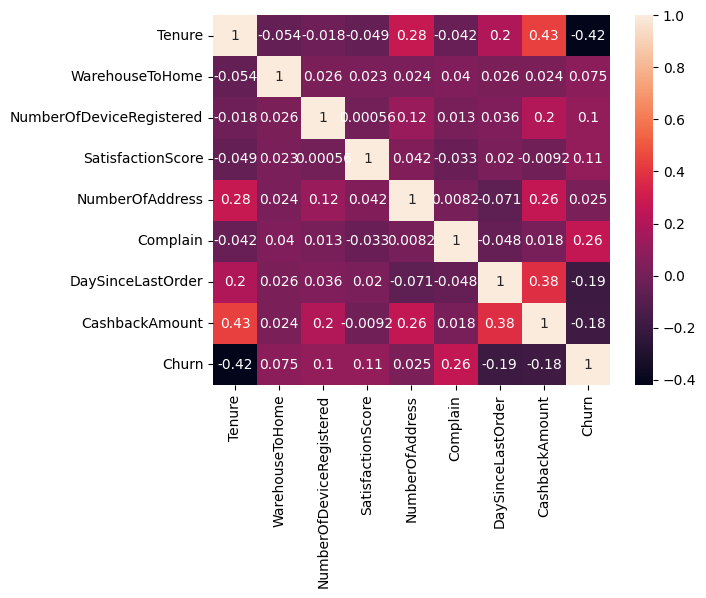

In [76]:
num_corr = numClass.corr(method='spearman')

sns.heatmap(num_corr, annot=True)

**Insight :**

- Looking at the heatmap graph obtained after carrying out the correlation test, the correlation values between variables are obtained. In this graph there are several variables that have quite `high correlation values` with the target variable

- Tenure variable has the highest correlation value with the target variable among other feature variables where this variable has a value of `-0.42`

- NumberOfAddress variable has the lowest correlation value with the target variable among other feature variables where this variable has a value of `0.025`

### Checking if the data is balanced or not

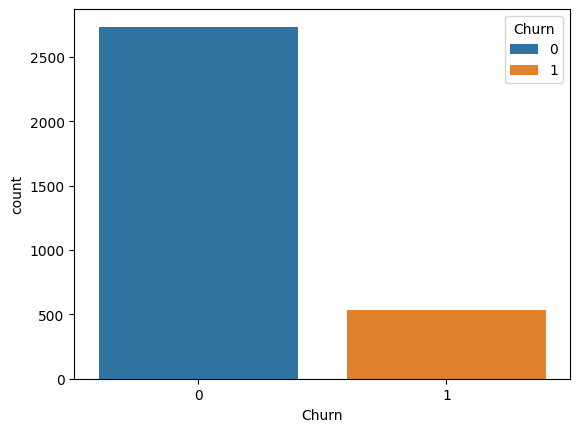

In [77]:
sns.countplot(data=churnCL, x='Churn', hue='Churn');

**Insight :**

- From the bar plot graph that has been created, it can be seen that the target variable has an `imbalanced` proportion

## Insight Analysis

After conducting data exploration on `clean data`, there are several points that can be taken regarding the customer churn dataset to provide insight into data preprocessing for machine learning. Following is an explanation of the points earned:

- After doing chi2 test to check categorical variabel depencencies, the following results are obtained:
    - It is found that several categorical feature variables are dependent to  variable that can be used as a label

    - Variables that have dependencies on the target variable are `PreferedOrderCat, MaritalStatus, TenureCat, DaySinceLastOrderCat, CashbackAMountCat, WarehouseToHomeCat`.

    So from the results of the chi2 test it can be seen that these categorical variables `can be used as features` for machine learning preprocessing

- After doing correlation test to check numerical variabel depencencies, the following results are obtained:
    - Looking at the heatmap graph obtained after carrying out the correlation test, the correlation values between variables are obtained. In this graph there are several variables that have quite `high correlation values` with the target variable

    - Tenure variable has the highest correlation value with the target variable among other feature variables where this variable has a value of `-0.42`

    - NumberOfAddress variable has the lowest correlation value with the target variable among other feature variables where this variable has a value of `0.025`

    So from the results of the correlation test it can be seen that these numerical variables `can be used as features` for machine learning preprocessing. However, it is important to remember that there is a possibility that variables that have `low correlation values will produce poor score` results during model evaluation

- After checking data proportion of target variable, the results obtained are the proportion of values in the target is `imbalance`. So in preprocessing we can add `sampling or class weights` to balance the proportions of the target variables

# # Data Preparation and Feature Engineering

After exploring the data, the next step is to preprocess the data on the features that will be used in machine learning. Data preprocessing is a necessary stage in machine learning to ensure that the data is of `high quality and suitable for analysis`. By addressing data quality issues, transforming data into a suitable format, and improving data consistency, `data preprocessing can significantly improve` the performance, generalizability, and interpretability of machine learning models

At this initial stage, `all features available` in the dataset are `used` as consideration for the final score value of the machine learning results. Experimentation on the use of multiple features can be considered by using the results of correlation tests carried out previously in data exploration

In accordance with previous data exploration, the data preprocessing carried out is as follows :

## 1. Define Feature / Target

Divide the variables in the dataset into feature variables and target variables. This division is carried out to group the expected input and output in machine learning

In [78]:
feat = churnCL.drop(['Churn', 'TenureCat', 'WarehouseToHomeCat', 'DaySinceLastOrderCat', 'CashbackAMountCat'], axis=1)
target = churnCL['Churn']

print(feat.shape)
print(target.shape)

(3270, 10)
(3270,)


A train-test split is a fundamental technique in machine learning that involves dividing the dataset into two subsets: a training set and a testing set. The purpose of this split is to `evaluate the performance` of a machine learning model on unseen data.

In [79]:
x_train, x_test, y_train, y_test = train_test_split(feat, target, test_size=0.2, random_state=48, stratify=target)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2616, 10)
(2616,)
(654, 10)
(654,)


In [80]:
x_train.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
2755,12.0,14.0,2,Laptop & Accessory,5,Married,3,1,8.0,181.05
3306,7.0,21.0,3,Fashion,1,Married,2,0,5.0,179.78
925,5.0,8.0,1,Laptop & Accessory,1,Single,8,0,7.0,150.55
525,4.0,16.0,3,Fashion,3,Married,5,0,NaN,210.31
3250,4.0,9.0,3,Fashion,3,Married,10,0,2.0,236.75


## 3. Feature Engineering & Score initialzing

At this stage, the tasks carried out are feature engineering and score initializing which is in accordance with the business understanding carried out previously, the score metric used is the `f2 score`

In [81]:
f2 = make_scorer(fbeta_score, beta=2)

For feature engineering, a function was created to make function calls easier so that there is not too much writing of functions. Looking at the data exploration, there are several techniques that need to be done, such as `imputing` empty data, `encoding` for categorical variables with the `object` data type and `scaling` to avoid bias, to prevent a variable from dominating and to keep the variable value within the appropriate range the same. The following is an explanation of the preprocessing used for each feature for machine learning

- For the `[ PreferedOrderCat ]` feature, the preprocessing that will be applied is encoding using `Binary Encoder`. The thing to consider on why using a Binary Encoder is the total unique values contained in the feature. 
    
    Binary Encoder is a technique used to transform categorical data into binary vectors. Binary encoding does not assign a numerical value to each category, but rather represents each category using a `unique binary vector`.

- For the `[ MaritalStatus ]` feature, the preprocessing that will be applied is encoding using `One Hot Encoder`. The thing to consider on why using a One Hot Encoder is the total unique values contained in the feature.

    One hot encoding is a common technique in machine learning preprocessing to transform categorical data into a numerical representation suitable for machine learning algorithms. It converts each category into a separate binary feature, where a `1 indicates the presence` of the category and a `0 indicates its absence`.

- For the `[ Tenure, WarehouseToHome, DaySinceLastOrder ]` features, there are two preprocessing that will be applied. First is imputing the NaN values using `Iterative Imptuter`. The next preprocessing is scaling it with `Robust Scaler`.

    The thing to consider on why using a Binary Encoder is the total unique values contained in the feature. The things to consider why using these two preprocessing are as follows. For Iterative Imputer the reason is that data on features is `not normally distributed and has greater accuracy than other imputing models`. iterative imputer is a technique used to fill in missing values in a dataset. It does this by iteratively estimating and imputing missing values based on the relationships between the features in the dataset. Unlike traditional imputation methods that simply replace missing values with a constant value or the mean/median of the feature, iterative imputation considers the context of the missing values and imputes them in a more sophisticated manner.
    
    Meanwhile for Robust Scaler the reason is that robust scaler is a technique used to standardize numerical data by centering and scaling each feature based on its interquartile range (IQR). This approach is particularly useful when dealing with data that may contain outliers, as the IQR is `less sensitive to extreme values` compared to traditional measures like mean and standard deviation.


- For the `[ NumberOfDeviceRegistered, NumberOfAddress, CashbackAmount ]` features, the preprocessing that will be applied is scaling with the same type of scaling as before which is `Robust Scaler`

- For the rest features like `[ SatisfactionScore, Complain ]` preprocessing action does not needed because the value of those feature is already on numeric.

In [82]:
# Model Preprocessing

def premodel(balance=False):

    if balance == False:
        imputePipeline = skPipeline([
            ('impute', IterativeImputer(random_state=48)),
            ('scale', RobustScaler()),
        ])
    elif balance == True:
        imputePipeline = imPipeline([
            ('impute', IterativeImputer(random_state=48)),
            ('scale', RobustScaler()),
        ])

    transformer = ColumnTransformer([
        ('encode1', BinaryEncoder(), ['PreferedOrderCat']),
        ('encode2', OneHotEncoder(drop='first'), ['MaritalStatus']),
        ('imputePipeline', imputePipeline, ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']),
        ('scale', RobustScaler(), ['NumberOfDeviceRegistered', 'NumberOfAddress', 'CashbackAmount']),
    ], remainder='passthrough', 
    )

    if balance == False:
        return skPipeline([
            ('preprocessing', transformer),
            ('clf', None)
        ])
    elif balance == True:
        return imPipeline([
            ('preprocessing', transformer),
            ('sampling', None),
            ('clf', None)
        ])

# # Model Searching

Looking at previous data exploration, it is known that the target variable in this dataset is imbalanced. Therefore, action is needed so that the data can be balanced. To balance the data, we can use `sampling` or penalty parameters such as `class weight`. 

`Sampling` is a technique used to balance an unbalanced dataset in a machine learning model. This technique can be used when the amount of data is insufficient or when the number of instances in one class is much less than the number of instances in another class.

The `class_weight` parameter in the machine learning model is used to handle class imbalance in the dataset. Using these parameters, we can assign different weights to each class so that the model can "pay attention" to minority classes better.

# # Model without Balancing

For the initial model experiment, a model that `does not use neither sampling nor class weight` where it can be used to balance the unbalanced dataset.

## Model Initialize

In the selection model, there are several models used, including the following:
- Logistic Regression
- Decision Tree Classifier
- K Neighbors Classifier
- Bagging Classifier
- Random Forest Classifier
- Gradient Boosting Classifier
- Adaboost Classifier
- LGBM Classifier

The Selection of this model is based on previous data exploration where it is hoped that the machine learning model obtained is `robust to the presence of outliers`. Apart from that, the determination is determined from my personal experience while studying machine learning models, where in my opinion the base model of these models has `fast computing`.

Apart from that, the `random_state=48` parameter is added to the model parameters to ensure that the data splitting process and the subsequent training procedure are reproducible. This means that running the code multiple times with the same random_state value will yield the same training and testing sets, leading to `consistent results`.

In [83]:
# Model init

logreg = LogisticRegression(random_state=48)
knnClass = KNeighborsClassifier()
dtClass = DecisionTreeClassifier(random_state=48)

baggingClass = BaggingClassifier(estimator=dtClass, random_state=48)
rfClass = RandomForestClassifier(random_state=48)
xgbClass = XGBClassifier(random_state=48)
gbsClass = GradientBoostingClassifier(random_state=48)
adaboostClass = AdaBoostClassifier(estimator=dtClass, random_state=48)
lgbmClass = LGBMClassifier(random_state=48)

im_model_list = [
                logreg, 
                dtClass, 
                knnClass, 
                baggingClass, 
                rfClass, 
                xgbClass, 
                gbsClass, 
                adaboostClass, 
                lgbmClass
            ]


A train-test split is a fundamental technique in machine learning that involves dividing the dataset into two subsets: a training set and a testing set. The purpose of this split is to `evaluate the performance` of a machine learning model on unseen data.

In [84]:
x_train, x_test, y_train, y_test = train_test_split(feat, target, test_size=0.2, random_state=48, stratify=target)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2616, 10)
(2616,)
(654, 10)
(654,)


In [85]:
x_train.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
2755,12.0,14.0,2,Laptop & Accessory,5,Married,3,1,8.0,181.05
3306,7.0,21.0,3,Fashion,1,Married,2,0,5.0,179.78
925,5.0,8.0,1,Laptop & Accessory,1,Single,8,0,7.0,150.55
525,4.0,16.0,3,Fashion,3,Married,5,0,NaN,210.31
3250,4.0,9.0,3,Fashion,3,Married,10,0,2.0,236.75


## 3. Feature Engineering & Score initialzing

At this stage, the tasks carried out are feature engineering and score initializing which is in accordance with the business understanding carried out previously, the score metric used is the `f2 score`

In [86]:
f2 = make_scorer(fbeta_score, beta=2)

For feature engineering, a function was created to make function calls easier so that there is not too much writing of functions. Looking at the data exploration, there are several techniques that need to be done, such as `imputing` empty data, `encoding` for categorical variables with the `object` data type and `scaling` to avoid bias, to prevent a variable from dominating and to keep the variable value within the appropriate range the same. The following is an explanation of the preprocessing used for each feature for machine learning

- For the `[ PreferedOrderCat ]` feature, the preprocessing that will be applied is encoding using `Binary Encoder`. The thing to consider on why using a Binary Encoder is the total unique values contained in the feature. 
    
    Binary Encoder is a technique used to transform categorical data into binary vectors. Binary encoding does not assign a numerical value to each category, but rather represents each category using a `unique binary vector`.

- For the `[ MaritalStatus ]` feature, the preprocessing that will be applied is encoding using `One Hot Encoder`. The thing to consider on why using a One Hot Encoder is the total unique values contained in the feature.

    One hot encoding is a common technique in machine learning preprocessing to transform categorical data into a numerical representation suitable for machine learning algorithms. It converts each category into a separate binary feature, where a `1 indicates the presence` of the category and a `0 indicates its absence`.

- For the `[ Tenure, WarehouseToHome, DaySinceLastOrder ]` features, there are two preprocessing that will be applied. First is imputing the NaN values using `Iterative Imptuter`. The next preprocessing is scaling it with `Robust Scaler`.

    The thing to consider on why using a Binary Encoder is the total unique values contained in the feature. The things to consider why using these two preprocessing are as follows. For Iterative Imputer the reason is that data on features is `not normally distributed and has greater accuracy than other imputing models`. iterative imputer is a technique used to fill in missing values in a dataset. It does this by iteratively estimating and imputing missing values based on the relationships between the features in the dataset. Unlike traditional imputation methods that simply replace missing values with a constant value or the mean/median of the feature, iterative imputation considers the context of the missing values and imputes them in a more sophisticated manner.
    
    Meanwhile for Robust Scaler the reason is that robust scaler is a technique used to standardize numerical data by centering and scaling each feature based on its interquartile range (IQR). This approach is particularly useful when dealing with data that may contain outliers, as the IQR is `less sensitive to extreme values` compared to traditional measures like mean and standard deviation.


- For the `[ NumberOfDeviceRegistered, NumberOfAddress, CashbackAmount ]` features, the preprocessing that will be applied is scaling with the same type of scaling as before which is `Robust Scaler`

- For the rest features like `[ SatisfactionScore, Complain ]` preprocessing action does not needed because the value of those feature is already on numeric.

In [87]:
# Model Preprocessing

def premodel(balance=False):

    if balance == False:
        imputePipeline = skPipeline([
            ('impute', IterativeImputer(random_state=48)),
            ('scale', RobustScaler()),
        ])
    elif balance == True:
        imputePipeline = imPipeline([
            ('impute', IterativeImputer(random_state=48)),
            ('scale', RobustScaler()),
        ])

    transformer = ColumnTransformer([
        ('encode1', BinaryEncoder(), ['PreferedOrderCat']),
        ('encode2', OneHotEncoder(drop='first'), ['MaritalStatus']),
        ('imputePipeline', imputePipeline, ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']),
        ('scale', RobustScaler(), ['NumberOfDeviceRegistered', 'NumberOfAddress', 'CashbackAmount']),
    ], remainder='passthrough', 
    )

    if balance == False:
        return skPipeline([
            ('preprocessing', transformer),
            ('clf', None)
        ])
    elif balance == True:
        return imPipeline([
            ('preprocessing', transformer),
            ('sampling', None),
            ('clf', None)
        ])

# # Model Searching

Looking at previous data exploration, it is known that the target variable in this dataset is imbalanced. Therefore, action is needed so that the data can be balanced. To balance the data, we can use `sampling` or penalty parameters such as `class weight`. 

`Sampling` is a technique used to balance an unbalanced dataset in a machine learning model. This technique can be used when the amount of data is insufficient or when the number of instances in one class is much less than the number of instances in another class.

The `class_weight` parameter in the machine learning model is used to handle class imbalance in the dataset. Using these parameters, we can assign different weights to each class so that the model can "pay attention" to minority classes better.

# # Model without Balancing

For the initial model experiment, a model that `does not use neither sampling nor class weight` where it can be used to balance the unbalanced dataset.

## Model Initialize

In the selection model, there are several models used, including the following:
- Logistic Regression
- Decision Tree Classifier
- K Neighbors Classifier
- Bagging Classifier
- Random Forest Classifier
- Gradient Boosting Classifier
- Adaboost Classifier
- LGBM Classifier

The Selection of this model is based on previous data exploration where it is hoped that the machine learning model obtained is `robust to the presence of outliers`. Apart from that, the determination is determined from my personal experience while studying machine learning models, where in my opinion the base model of these models has `fast computing`.

Apart from that, the `random_state=48` parameter is added to the model parameters to ensure that the data splitting process and the subsequent training procedure are reproducible. This means that running the code multiple times with the same random_state value will yield the same training and testing sets, leading to `consistent results`.

In [ ]:
# Model init

logreg = LogisticRegression(random_state=48)
knnClass = KNeighborsClassifier()
dtClass = DecisionTreeClassifier(random_state=48)

baggingClass = BaggingClassifier(estimator=dtClass, random_state=48)
rfClass = RandomForestClassifier(random_state=48)
xgbClass = XGBClassifier(random_state=48)
gbsClass = GradientBoostingClassifier(random_state=48)
adaboostClass = AdaBoostClassifier(estimator=dtClass, random_state=48)
lgbmClass = LGBMClassifier(random_state=48)

im_model_list = [
                logreg, 
                dtClass, 
                knnClass, 
                baggingClass, 
                rfClass, 
                xgbClass, 
                gbsClass, 
                adaboostClass, 
                lgbmClass
            ]


## Model Benchmarking

In model benchmarking, the technique used is to use the `cross validate` capability contained in the `GridsearchCV` function so that score results are obtained from the model listed previously where the evaluation metric used is in accordance with the previous business understanding which uses `F2-score`.

In [ ]:
imModelSearch = {
    'clf' : im_model_list, 
}

imGridSearch = GridSearchCV(
    estimator=premodel(balance=False),
    param_grid=imModelSearch,
    scoring=f2,
    verbose=3,
    return_train_score=True,
    cv=StratifiedKFold(),
    # n_jobs=-1
)

In [ ]:
imGridSearch.fit(x_train, y_train)

In [ ]:
imGridSearch.best_estimator_

In [ ]:
imGridSearch.best_params_

In [ ]:
imGridSearch.best_score_

In [ ]:
imCVR = pd.DataFrame(imGridSearch.cv_results_).sort_values('rank_test_score')
imCVR = imCVR[['rank_test_score', 'param_clf','mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']]
imCVR.set_index('rank_test_score').head(15)

After carrying out cross validation, several models were obtained that had the best test scores and train scores. The following are the `insights` obtained along with the tasks that need to be carried out as a reference for carrying out hyperparameter tuning.

1. XGB Classifier
    - In the XGB classifier, the mean test score value is `0.652611`, while the mean train score value is `0.999883`. From the score results, it was found that there were indications of 'overfitting'. So hyperparameter tuning aims to `reduce overfitting` and `increase the score value`.
    
    - For the standard deviation score on the test, the value was `0.058409`, while for the standard deviation score on the train, the value was `0.000234`. From these results, the hypertunning task parameters are obtained to `reduce` this score so that the standard deviation is smaller and the distribution value is close to the average value of the data.

2. LGBM Classifier
    - In the LGBM classifier, the mean test score value is `0.652269`, while the mean train score value is `0.988038`. From the score results, it was found that there were indications of 'overfitting'. So hyperparameter tuning aims to `reduce overfitting` and `increase the score value`.

    - For the standard deviation score on the test, the value was `0.051483`, while for the standard deviation score on the train, the value was `0.005253`. From these results, the hypertunning task parameters are obtained to `reduce` this score so that the standard deviation is smaller and the distribution value is close to the average value of the data.

## Hypertunning Parameter

### XGB Classifier

In [ ]:
xgbClass.get_params()

In the tuning parameters of the XGBClassifier, the parameters to be tuned are as follows.

- `Learning rate`: This parameter determines how much change is made to the model at each boosting iteration. Smaller values will make the model more conservative and reduce the risk of overfitting.

- `Maximum tree depth (max_depth)`: This parameter determines the maximum depth of each tree in the model. Higher values will make the model more complex and potentially more accurate, but also more susceptible to overfitting.

- `Minimum child weight (min_child_weight)`: This parameter determines the minimum number of observations required on each child node. Higher values will make the model more conservative and reduce the risk of overfitting.

- `Subsample (subsample)`: This parameter determines the portion of the data used to build each tree. Lower values will make the model more conservative and reduce the risk of overfitting.

- `Colsample_bytree (colsample_bytree)`: This parameter specifies the subset of features used to build each tree. Lower values will make the model more conservative and reduce the risk of overfitting.

In [ ]:
# Membuat objek untuk search parameter
imParameterSpace_xgbClass = {
    'clf' : [xgbClass],
    'clf__learning_rate' : [0.01, 0.1, 1, 10, 95],
    'clf__max_depth' : [1, 2, 3, 5],
    'clf__min_child_weight' : [1, 3, 5, 10],
    'clf__subsample' : [0.2, 0.4, 0.6, 0.8],
    'clf__colsample_bytree' : [0.2, 0.4, 0.6, 0.8],
    # 'clf__gamma' : [1, 3, 5, 10],
    # 'clf__max_delta_step' : [1, 3, 5, 10],
    # 'clf__reg_alpha' : [0, 5, 10],
    # 'clf__reg_lambda' : [-1, 5, 10],
    
}

imGridSearch_xgbClass =  GridSearchCV(
    estimator = premodel(balance=False),
    param_grid = imParameterSpace_xgbClass,
    scoring = f2,
    verbose = 3,
    return_train_score=True,
    cv=StratifiedKFold()
)

In [ ]:
imGridSearch_xgbClass.fit(x_train, y_train)

In [ ]:
imGridSearch_xgbClass.best_estimator_

In [ ]:
imGridSearch_xgbClass.best_params_

In [ ]:
imGridSearch_xgbClass.best_score_

In [ ]:
imCVR_xgbClass = pd.DataFrame(imGridSearch_xgbClass.cv_results_).sort_values('rank_test_score')
imCVR_xgbClass = imCVR_xgbClass[['rank_test_score', 'param_clf',  'param_clf__colsample_bytree',
                                'param_clf__learning_rate', 'param_clf__max_depth', 'param_clf__min_child_weight',
                                'param_clf__subsample',
                                'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']]
imCVR_xgbClass.set_index('rank_test_score').head(15)

After performing hyperparameter tuning, the best parameters for the XGB Classifier model are obtained as follows
- 'clf__colsample_bytree': 0.8,
- 'clf__learning_rate': 95,
- 'clf__max_depth': 5,
- 'clf__min_child_weight': 1,
- 'clf__subsample': 0.6

By using these parameters, the mean test score was `0.681573` and the mean train score was `0.712461`, while the standard deviation test score was `0.036799` and the standard deviation train score was `0.008591`.

It can be seen that after tuning, the test score results have `increased` and the standard deviation of the test score has also `decreased` compared to the results obtained before hyperparameter tuning.

Apart from that, there was also a `reduction` in indications of overfitting in the model seen from the `reduced` range between the mean test score and the mean train score in the cross validation results.

### LGBM Classifier

In [ ]:
lgbmClass.get_params()

In the tuning parameters of the LGBM Classifier, the parameters to be tuned are as follows.

- `Num_leaves` : Maximum number of leaves on each tree. Larger values will produce more complex and accurate models, but are also more susceptible to overfitting.

- `Max_depth` : Maximum depth of the tree. Larger values will produce more complex and accurate models, but are also more susceptible to overfitting.

- `Learning_rate` : Learning rate. Larger values will cause the model to learn faster, but can also lead to overfitting.

- `Min_child_samples` : The minimum number of samples required to create a branch in the tree. Larger values will make the model more stable, but can also lead to underfitting.

- `Min_split_gain` : The minimum gain value required to create a branch in the tree. Larger values will make the model more stable, but can also lead to underfitting.

- `Subsample` : The percentage of data samples used to build each tree. A smaller value will make the model more robust to noise, but can also cause underfitting.

- `Colsample_bytree` : Percentage of features used to build each tree. A smaller value will make the model more robust to noise, but can also cause underfitting.



In [ ]:
# Membuat objek untuk search parameter
imParameterSpace_lgbmClass = {
    'clf' : [lgbmClass],
    # "clf__num_leaves": [45, 60],
    # "clf__max_depth": [10, 15, 20],
    # "clf__learning_rate": [0.01, 0.1, 1],
    # "clf__min_child_samples": [15, 20, 30],
    # # "clf__min_split_gain": [1, 5],
    # "clf__subsample": [0.5,  1.0],
    # "clf__colsample_bytree": [0.1, 0.5, 0.8]
    'clf__colsample_bytree': [0.8],
    'clf__learning_rate': [1],
    'clf__max_depth': [20],
    'clf__min_child_samples': [30],
    'clf__num_leaves': [45],
    'clf__subsample': [0.5]
}

imGridSearch_lgbmClass =  GridSearchCV(
    estimator = premodel(balance=False),
    param_grid = imParameterSpace_lgbmClass,
    scoring = f2,
    verbose = 3,
    return_train_score=True,
    cv=StratifiedKFold()
)

In [ ]:
imGridSearch_lgbmClass.fit(x_train, y_train)

In [ ]:
imGridSearch_lgbmClass.best_estimator_

In [ ]:
imGridSearch_lgbmClass.best_score_

In [ ]:
imGridSearch_lgbmClass.best_params_

In [ ]:
imCVR_lgbmClass = pd.DataFrame(imGridSearch_lgbmClass.cv_results_).sort_values('rank_test_score')
imCVR_lgbmClass = imCVR_lgbmClass[['rank_test_score', 'param_clf',  'param_clf__colsample_bytree',
                                'param_clf__learning_rate', 'param_clf__max_depth', 'param_clf__min_child_samples',
                                'param_clf__num_leaves', 'param_clf__subsample',
                                'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']]
imCVR_lgbmClass.set_index('rank_test_score').head(30)

After performing hyperparameter tuning, the best parameters for the LGBM Classifier model are obtained as follows
- 'clf__colsample_bytree' : 0.8,
- 'clf__learning_rate' : 1,
- 'clf__max_depth' : 20,
- 'clf__min_child_samples' : 30,
- 'clf__num_leaves' : 45,
- 'clf__subsample' : 0.5

By using these parameters, the mean test score was `0.676865` and the mean train score was `1.0`, while the standard deviation test score was `0.038249` and the standard deviation train score was `0.0`.

It can be seen that after tuning, the test score results have `increased` and the standard deviation of the test score has also `decreased` compared to the results obtained before hyperparameter tuning.

Apart from that, there are also indications of overfitting in the model which can still `can be seen` from the range between the mean test score and the mean train score in the cross validation results.

# # Model with Balancing

For initial model experiments, models that `use sampling or class weights` can be used to balance an unbalanced data set.

## Model Initizalize

In selecting the model, some of the models used are the `same as the previous` model experiments, but there is an additional `'balance'` value in some models which have `class weight` parameters.

In [ ]:
# Model init

logreg = LogisticRegression(random_state=48, class_weight='balanced')
knnClass = KNeighborsClassifier()
dtClass = DecisionTreeClassifier(random_state=48, class_weight='balanced')
svc = SVC(random_state=48, class_weight='balanced')

baggingClass = BaggingClassifier(estimator=dtClass, random_state=48)
rfClass = RandomForestClassifier(random_state=48, class_weight='balanced')
xgbClass = XGBClassifier(random_state=48)
gbsClass = GradientBoostingClassifier(random_state=48)
adaboostClass = AdaBoostClassifier(estimator=dtClass, random_state=48)
lgbmClass = LGBMClassifier(random_state=48)

bl_model_list = [
                logreg, 
                dtClass, 
                knnClass, 
                baggingClass, 
                rfClass, 
                xgbClass, 
                gbsClass, 
                adaboostClass, 
                lgbmClass
            ]

## Model Benchmarking

In model benchmarking, the technique used is to use the `cross validate` capability contained in the `GridsearchCV` function so that score results are obtained from the model listed previously where the evaluation metric used is in accordance with the previous business understanding which uses `F2-score`.

In [ ]:
blModelSearch = {
    'clf' : bl_model_list,
    'sampling' :[RandomOverSampler(random_state=48),
                 SMOTE(random_state=48),
                 RandomUnderSampler(random_state=48),
                #  CondensedNearestNeighbour(random_state=48),
                 NearMiss(),
                 SMOTEENN(random_state=48),
                 SMOTETomek(random_state=48),
                 ADASYN(random_state=48),
                 KMeansSMOTE(random_state=48),
                 SVMSMOTE(random_state=48)
    ]
}



blGridSearch = GridSearchCV(
    estimator=premodel(True),
    param_grid=blModelSearch,
    scoring=f2,
    verbose=3,
    return_train_score=True,
    cv=StratifiedKFold(),
    # n_jobs=-1
)

In [ ]:
blGridSearch.fit(x_train,y_train)

In [ ]:
blGridSearch.best_estimator_

In [ ]:
blGridSearch.best_score_

In [ ]:
blGridSearch.best_params_

In [ ]:
blCVR = pd.DataFrame(blGridSearch.cv_results_).sort_values('rank_test_score')
blCVR = blCVR[['rank_test_score', 'param_clf', 'param_sampling',
            'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']]
blCVR.set_index('rank_test_score').head(15)

After carrying out cross validation, several models were obtained that had the best test scores and train scores. The following are the `insights` obtained along with the tasks that need to be carried out as a reference for carrying out hyperparameter tuning.

1. Random Forest Classifier
    - In the Random Forest classifier, the mean test score value is `0.753820`, while the mean train score value is `0.894898`. From the score results, it was found that there were indications of 'overfitting'. So hyperparameter tuning aims to `eliminate overfitting` and `increase the score value`.
    
    - For the standard deviation score on the test, the value was `0.026940`, while for the standard deviation score on the train, the value was `0.009699`. From these results, the hypertunning task parameters are obtained to `reduce` this score so that the standard deviation is smaller and the distribution value is close to the average value of the data.

2. XGB Classifier
    - In the XGB classifier, the mean test score value is `0.749114`, while the mean train score value is `0.889907`. From the score results, it was found that there were indications of 'overfitting'. So hyperparameter tuning aims to `eliminate overfitting` and `increase the score value`.

    - For the standard deviation score on the test, the value was `0.037803`, while for the standard deviation score on the train, the value was `0.006625`. From these results, the hypertunning task parameters are obtained to `reduce` this score so that the standard deviation is smaller and the distribution value is close to the average value of the data.

## Hypertunning Parameter

### Random Forest Classifier

In [ ]:
rfClass.get_params()

In the tuning parameters of the Random Forest Classifier, the parameters to be tuned are as follows.

- `n_estimators` : This parameter determines the number of trees in the forest. Increasing the number of trees generally improves the model's accuracy, but it also increases computational cost.

- `max_depth` : This parameter controls the maximum depth of each tree. A deeper tree can capture more complex relationships in the data, but it may also lead to overfitting.

- `max_features` : This parameter specifies the maximum number of features considered for splitting at each node. A larger number of features may improve performance, but it can also increase the risk of overfitting.

- `criterion` : This parameter determines the criterion used to measure the quality of a split. Common options include "gini", "entropy", and "log_loss"

- `min_samples_split` : This parameter specifies the minimum number of samples required to split a node. A larger number helps prevent overfitting, but it may also increase bias.

- `min_samples_leaf` : This parameter specifies the minimum number of samples required in a leaf node. A larger number helps prevent overfitting, but it may also increase bias.



In [ ]:
# Membuat objek untuk search parameter
blParameterSpace_rfClass = {
    'clf' : [rfClass],
    'sampling' : [RandomUnderSampler(random_state=48)],
    'clf__n_estimators' : [30, 50, 70],
    # 'clf__n_estimators' : [20, 50, 100],
    'clf__criterion' : ['gini', 'log_loss', 'entropy'],
    'clf__max_depth' : [None],
    # 'clf__max_depth' : [None, -1],
    'clf__min_samples_split' : [2],
    'clf__min_samples_leaf' : [2],
    # 'clf__min_samples_split' : [2, 3, 5],
    # 'clf__min_samples_leaf' : [2, 3, 5],
    'clf__max_features' : ['sqrt', 'log2', None],
}

blGridSearch_rfClass =  GridSearchCV(
    estimator = premodel(True),
    param_grid = blParameterSpace_rfClass,
    scoring = f2,
    verbose = 3,
    return_train_score=True,
    cv=StratifiedKFold()
)


In [ ]:
blGridSearch_rfClass.fit(x_train,y_train)

In [ ]:
blGridSearch_rfClass.best_estimator_

In [ ]:
blGridSearch_rfClass.best_score_

In [ ]:
blGridSearch_rfClass.best_params_

In [ ]:
blCVR_rfClass = pd.DataFrame(blGridSearch_rfClass.cv_results_).sort_values('rank_test_score')
blCVR_rfClass = blCVR_rfClass[['rank_test_score', 'param_clf', 'param_sampling', 
                                'param_clf__criterion', 'param_clf__max_depth', 'param_clf__max_features', 'param_clf__min_samples_leaf', 
                                'param_clf__min_samples_split', 'param_clf__n_estimators',
                                'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']]
blCVR_rfClass.set_index('rank_test_score').head(15)

After performing hyperparameter tuning, the best parameters for the Random Forest Classifier model are obtained as follows
- 'clf__colsample_bytree': 0.6,
- 'clf__learning_rate': 0.1,
- 'clf__max_depth': 5,
- 'clf__min_child_weight': 1,
- 'clf__subsample': 0.6,

By using these parameters, the mean test score was `0.754415` and the mean train score was `0.864160`, while the standard deviation test score was `0.033318` and the standard deviation train score was `0.007347`.

It can be seen that after tuning, the test score results have `increased` and the standard deviation of the test score has also `decreased` compared to the results obtained before hyperparameter tuning.

Apart from that, there are also indications of overfitting in the model which can still `can be seen` from the range between the mean test score and the mean train score in the cross validation results.

### XGB Classifier

In [ ]:
xgbClass.get_params()

In the tuning parameters of the XGBClassifier, the parameters to be tuned is same as XGB Classifier before which is like below.

- `Learning rate`: This parameter determines how much change is made to the model at each boosting iteration. Smaller values will make the model more conservative and reduce the risk of overfitting.

- `Maximum tree depth (max_depth)`: This parameter determines the maximum depth of each tree in the model. Higher values will make the model more complex and potentially more accurate, but also more susceptible to overfitting.

- `Minimum child weight (min_child_weight)`: This parameter determines the minimum number of observations required on each child node. Higher values will make the model more conservative and reduce the risk of overfitting.

- `Subsample (subsample)`: This parameter determines the portion of the data used to build each tree. Lower values will make the model more conservative and reduce the risk of overfitting.

- `Colsample_bytree (colsample_bytree)`: This parameter specifies the subset of features used to build each tree. Lower values will make the model more conservative and reduce the risk of overfitting.

In [ ]:
# Membuat objek untuk search parameter
blParameterSpace_xgbClass = {
    'clf' : [xgbClass],
    'sampling' : [RandomUnderSampler(random_state=48)],
    'clf__learning_rate' : [0.01, 0.1, 1, 10, 95],
    'clf__max_depth' : [1, 2, 3, 5],
    'clf__min_child_weight' : [1, 3, 5, 10],
    'clf__subsample' : [0.2, 0.4, 0.6, 0.8],
    'clf__colsample_bytree' : [0.2, 0.4, 0.6, 0.8],
    # 'clf__gamma' : [1, 3, 5, 10],
    # 'clf__max_delta_step' : [1, 3, 5, 10],
    # 'clf__reg_alpha' : [0, 5, 10],
    # 'clf__reg_lambda' : [-1, 5, 10],
    
}

blGridSearch_xgbClass =  GridSearchCV(
    estimator = premodel(balance=True),
    param_grid = blParameterSpace_xgbClass,
    scoring = f2,
    verbose = 3,
    return_train_score=True,
    cv=StratifiedKFold()
)

In [ ]:
blGridSearch_xgbClass.fit(x_train, y_train)

In [ ]:
blGridSearch_xgbClass.best_estimator_

In [ ]:
blGridSearch_xgbClass.best_params_

In [ ]:
blGridSearch_xgbClass.best_score_

In [ ]:
blCVR_xgbClass = pd.DataFrame(blGridSearch_xgbClass.cv_results_).sort_values('rank_test_score')
blCVR_xgbClass = blCVR_xgbClass[['rank_test_score', 'param_clf', 'param_sampling', 'param_clf__colsample_bytree',
                                'param_clf__learning_rate', 'param_clf__max_depth', 'param_clf__min_child_weight',
                                'param_clf__subsample',
                                'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']]
blCVR_xgbClass.set_index('rank_test_score').head(15)

After performing hyperparameter tuning, the best parameters for the XGB Classifier model are obtained as follows
- 'clf__criterion': 'log_loss',
- 'clf__max_depth': None,
- 'clf__max_features': 'sqrt',
- 'clf__min_samples_leaf': 2,
- 'clf__min_samples_split': 2,
- 'clf__n_estimators': 70,

By using these parameters, the mean test score was `0.756000` and the mean train score was `0.877339`, while the standard deviation test score was `0.027792` and the standard deviation train score was `0.007398`.

It can be seen that after tuning, the test score results have `increased` and the standard deviation of the test score has also `decreased` compared to the results obtained before hyperparameter tuning.

Apart from that, there are also indications of overfitting in the model which can still `can be seen` from the range between the mean test score and the mean train score in the cross validation results but the range is `decreasing`.

# # Model Comparison


From the previous model experimentation, 4 candidate models were obtained that can be used as machine learning to solve the business problems that were formulated at the beginning. The following is an evaluation sumarry of the model.

## Model without Balancing


In [ ]:
dfImXGBClassDef = imCVR.iloc[0:1,2:].reset_index(drop=True)
dfImXGBClassTuned = imCVR_xgbClass.iloc[0:1,7:].reset_index(drop=True)

dfImXGBClass = pd.concat([dfImXGBClassDef, dfImXGBClassTuned])
dfImXGBClass['Model'] = ['Default', 'Tuned']
dfImXGBClass = dfImXGBClass.set_index('Model')

dfImXGBClass

In [ ]:
((dfImXGBClass.T['Tuned'] - dfImXGBClass.T['Default']) * 100).round(2)

In [ ]:
dfImLGBMClassDef = imCVR.iloc[1:2,2:].reset_index(drop=True)
dfImLGBMClassTuned = imCVR_lgbmClass.iloc[0:1,8:].reset_index(drop=True)

dfImLGBMClass = pd.concat([dfImLGBMClassDef, dfImLGBMClassTuned])
dfImLGBMClass['Model'] = ['Default', 'Tuned']
dfImLGBMClass = dfImLGBMClass.set_index('Model')

dfImLGBMClass

In [ ]:
((dfImLGBMClass.T['Tuned'] - dfImLGBMClass.T['Default']) * 100).round(2)

### XGB Classifier
In the default model, the XGB Classifier model gets the highest score, where in GridSeach the score is as follows.
- mean test score: `0.652611`
- mean train score : `0.999883`
- std test score: `0.058409`
- std train score : `0.000234`.

As previously explained, there are indications of `overfitting` in the model so that tuning of the model parameters is required, where after tuning the scores are obtained as follows.
- mean test score: `0.681573`
- mean train score : `0.712461`
- std test score: `0.036799`
- std train score : `0.008591`.

After tuning, there is an increase and decrease in the score value. The following is a further explanation.
- mean_test_score: there is an increase in score of `2.90%`
- std_test_score: there is a decrease in score `-2.16%`
- mean_train_score: there is a decrease in score `-28.74%`
- std_train_score: there is an increase in score of `0.84%`

From the tuning model, it can be seen that there are `decreasing indications of overfitting` and the `deviation value is also decreasing`

### LGBM Classifier
In the default model, LGBM XGB Classifier model gets the highest score, where in GridSeach the score is as follows.
- mean test score: `0.652269`
- mean train score : `0.988038`
- std test score: `0.051483`
- std train score : `0.005253`

As previously explained, there are indications of `overfitting` in the model so that tuning of the model parameters is required, where after tuning the scores are obtained as follows.
- mean test score: `0.676865`
- mean train score : `1.0`
- std test score: `0.038249`
- std train score : `0.0`

After tuning, there is an increase and decrease in the score value. The following is a further explanation.
- mean_test_score: there is an increase in score of `2.46%`
- std_test_score: there is a decrease in score `-1.32%`
- mean_train_score: there is a increase in score `1.20%`
- std_train_score: there is an decrease in score of `-0.53%`

From the tuning model, it can be seen that there are `still indications of overfitting` and the `deviation value is also decreasing`

### Analysis
After analyzing the model score results, it can be seen that the two models without balancing `Tuned XGB Classifier `have the best scores.

## Model with Balancing

In [ ]:
dfRFClassDef = blCVR.iloc[0:1, 3:].reset_index(drop=True)
dfRFClassTuned = blCVR_rfClass.iloc[0:1,9:].reset_index(drop=True)

dfRFClass = pd.concat([dfRFClassDef, dfRFClassTuned])
dfRFClass['Model'] = ['Default', 'Tuned']
dfRFClass = dfRFClass.set_index('Model')

dfRFClass

In [ ]:
dfblXGBClassDef = blCVR.iloc[1:2, 3:].reset_index(drop=True)
dfblXGBClassTuned = blCVR_xgbClass.iloc[0:1, 8:].reset_index(drop=True)

dfblXGBClass = pd.concat([dfblXGBClassDef, dfblXGBClassTuned])
dfblXGBClass['Model'] = ['Default', 'Tuned']
dfblXGBClass = dfblXGBClass.set_index('Model')

dfblXGBClass

In [ ]:
((dfRFClass.T['Tuned'] - dfRFClass.T['Default']) * 100).round(2)

In [ ]:
((dfblXGBClass.T['Tuned'] - dfblXGBClass.T['Default']) * 100).round(2)

### Random Forest Classifier with Random Under Sampler
In the default model, the Random Forest Classifier model gets the highest score, where in GridSeach the score is as follows.
- mean test score: `0.753820`
- mean train score : `0.894898`
- std test score: `0.026940`
- std train score : `0.009699`.

As previously explained, there are indications of `overfitting` in the model so that tuning of the model parameters is required, where after tuning the scores are obtained as follows.
- mean test score: `0.756000`
- mean train score : `0.877339`
- std test score: `0.027792`
- std train score : `0.007398`.

After tuning, there is an increase and decrease in the score value. The following is a further explanation.
- mean_test_score: there is an increase in score of `0.22%`
- std_test_score: there is a decrease in score `0.09%`
- mean_train_score: there is a decrease in score `-1.76%`
- std_train_score: there is an increase in score of `-0.23%`

From the tuning model, it can be seen that there are `decreasing indications of overfitting` and the `deviation value is also decreasing`

### XGB Classifier with Random Under Sampler
In the default model, LGBM  Classifier model gets the highest score, where in GridSeach the score is as follows.
- mean test score: `0.749114	`
- mean train score : `0.988038`
- std test score: `0.037803	`
- std train score : `0.006625`.

As previously explained, there are indications of `overfitting` in the model so that tuning of the model parameters is required, where after tuning the scores are obtained as follows.
- mean test score: `0.754415`
- mean train score : `0.864160`
- std test score: `0.033318`
- std train score : `0.007347`.

After tuning, there is an increase and decrease in the score value. The following is a further explanation.
- mean_test_score: there is an increase in score of `0.53%`
- std_test_score: there is a decrease in score `-0.45%`
- mean_train_score: there is a decrease in score `-2.57%`
- std_train_score: there is an increase in score of `-0.07%`

From the tuning model, it can be seen that there are `decreasing indications of overfitting` and the `deviation value is also decreasing`

### Analysis
After analyzing the model score results, it can be seen that the two models with balancing `Tuned Random Forest Classifier` with `Random Under Sampler` have the best scores.

In [ ]:
dfImXGBClass.T.iloc[:, 1:].reset_index(names='Model')

In [ ]:
dfRFClass.T.iloc[:, 1:].reset_index(names='Model')

In [ ]:
print('Tuned_x : XGB Classifier')
print('Tuned_y : Random Forest Classifer with Random Under Sampler')

pd.merge(dfImXGBClass.T.iloc[:, 1:].reset_index(names='Model'), 
          dfRFClass.T.iloc[:, 1:].reset_index(names='Model'),
          on='Model'
          ).set_index('Model')

## Conclusion

After comparison, the score on the Tuned Random Forest Classifier with Random Under Sampler has a better value than the Tuned XGB Classifier. So it can be concluded that for this business problem project the appropriate model is `Random Forest Classifier with Random Under Sampler`.

# # Model Evaluation

In [ ]:
y_test_pred = blGridSearch_rfClass.predict(x_test)

In [ ]:
finModel = blGridSearch_rfClass.best_estimator_.named_steps['clf']
preprocess = blGridSearch_rfClass.best_estimator_.named_steps['preprocessing']

---
Incase dont want to run all

In [88]:
finModel = RandomForestClassifier(random_state=48,
                                class_weight='balanced',
                                criterion='log_loss',
                                max_depth=None,
                                max_features='sqrt',
                                min_samples_leaf=2,
                                min_samples_split=2,
                                n_estimators=70,
)

finImputePipeline = imPipeline([
                ('impute', IterativeImputer(random_state=48)),
                ('scale', RobustScaler()),
            ])

finTransformer = ColumnTransformer([
        ('encode1', BinaryEncoder(), ['PreferedOrderCat']),
        ('encode2', OneHotEncoder(drop='first'), ['MaritalStatus']),
        ('imputePipeline', finImputePipeline, ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']),
        ('scale', RobustScaler(), ['NumberOfDeviceRegistered', 'NumberOfAddress', 'CashbackAmount']),
    ], remainder='passthrough', 
    )

finModelPipeline = imPipeline([
            ('preprocessing', finTransformer),
            ('sampling', RandomUnderSampler(random_state=48)),
            ('clf', finModel)
        ])

In [89]:
finModelPipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode1', BinaryEncoder(),
                                                  ['PreferedOrderCat']),
                                                 ('encode2',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus']),
                                                 ('imputePipeline',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer(random_state=48)),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'DaySinceLastOrder']),
                                                 ('scale', RobustScaler(),
                                                  ['NumberOfDeviceRegistered',
                                                   'NumberOfAddress',
                                                   'CashbackAmount'])])),
                ('sampling', RandomUnderSampler(random_state=48)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='log_loss',
                                        min_samples_leaf=2, n_estimators=70,
                                        random_state=48))])

In [90]:
y_test_pred = finModelPipeline.predict(x_test)

---

In [91]:
print(classification_report(y_test, y_test_pred))
print(f'Precision Score: {precision_score(y_test, y_test_pred)}')
print(f'Recall Score: {recall_score(y_test, y_test_pred)}')
print(f'F2 Score: {fbeta_score(y_test, y_test_pred, beta=2)}')
print(f'ROC-AOC Score: {roc_auc_score(y_test, y_test_pred)}')

              precision    recall  f1-score   support

           0       0.97      0.87      0.91       547
           1       0.56      0.84      0.67       107

    accuracy                           0.86       654
   macro avg       0.76      0.85      0.79       654
weighted avg       0.90      0.86      0.87       654

Precision Score: 0.5555555555555556
Recall Score: 0.8411214953271028
F2 Score: 0.7627118644067796
ROC-AOC Score: 0.8547472193271711


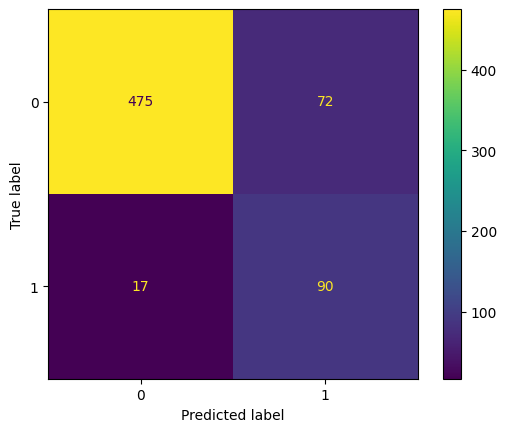

In [92]:
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm).plot();

# # Feature Importance

In [93]:
finModelPipeline.named_steps['clf']

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       min_samples_leaf=2, n_estimators=70, random_state=48)

In [94]:
model = finModelPipeline.named_steps['clf']
preprocess = finModelPipeline.named_steps['preprocessing']

In [95]:
values = finModelPipeline.named_steps['clf'].feature_importances_
feature = finModelPipeline.named_steps['preprocessing'].get_feature_names_out()

<BarContainer object of 13 artists>

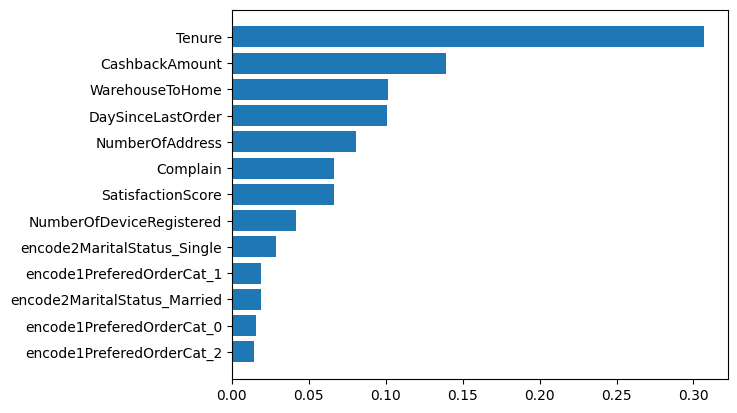

In [96]:
imp = pd.DataFrame({'feature': feature, 'values':values}).sort_values('values', ascending=False).sort_values('values')
# imp_10 = imp.sort_values('values')

plt.barh(y=imp['feature'].str.replace(pat=r'[A-Za-z]*__', repl="", regex=True), width=imp['values'])

## Partial Dependence Method

In [97]:
preprocess.fit(x_train)
x_train_pre = preprocess.transform(x_train)
reg = model.fit(x_train_pre, y_train)

df_train_pre = pd.DataFrame(x_train_pre, columns=preprocess.get_feature_names_out())

In [98]:
len(df_train_pre.columns)

13

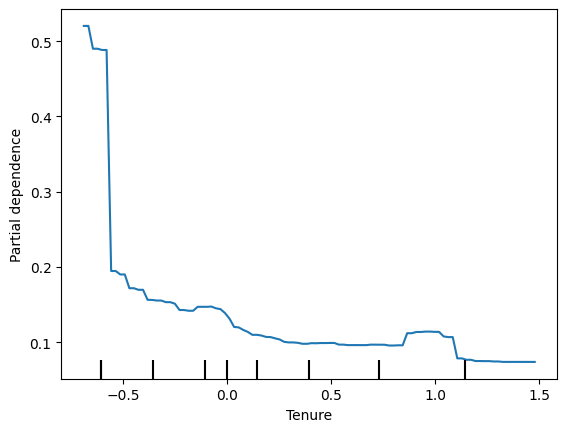

In [99]:
PartialDependenceDisplay.from_estimator(
    reg, x_train_pre, features=[5], feature_names=df_train_pre.columns.str.replace(pat=r'[A-Za-z]*__', repl="", regex=True)
)

## Shap

In [100]:
model = finModelPipeline.named_steps['clf']
preprocess = finModelPipeline.named_steps['preprocessing']

In [101]:
preprocess.fit(x_train)
x_train_pre = preprocess.transform(x_train)
x_train_pre = pd.DataFrame(x_train_pre, columns=preprocess.get_feature_names_out())
x_test_pre = preprocess.transform(x_test)

In [102]:
model.fit(x_train_pre, y_train)

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       min_samples_leaf=2, n_estimators=70, random_state=48)

In [103]:
explainer = shap.TreeExplainer(
    model,
    x_train_pre,
    model_output='raw',
    feature_names=preprocess.get_feature_names_out()
)

 93%|=================== | 1222/1308 [00:17<00:01]       

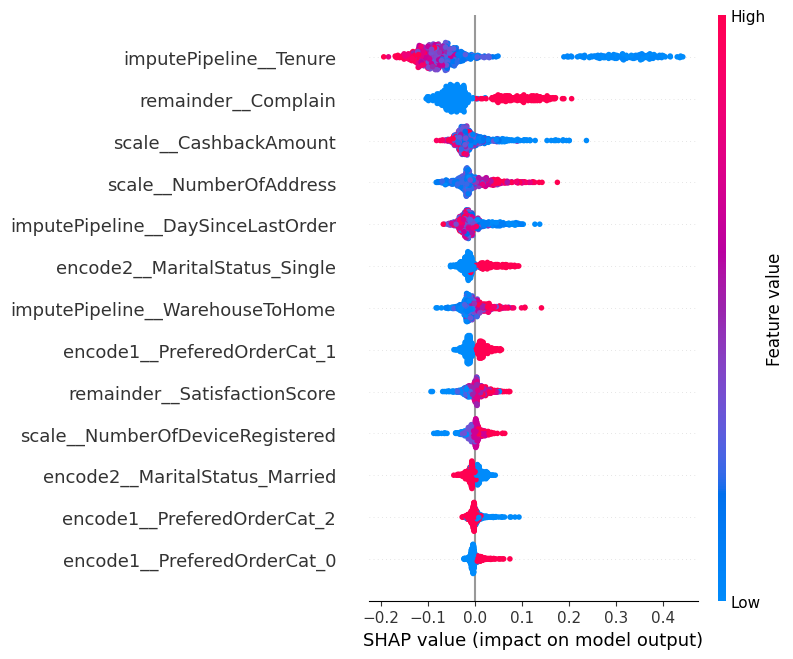

In [104]:
shap_val = explainer(x_test_pre,
                     check_additivity=False)

shap_val = shap_val[..., 1]

shap.summary_plot(shap_val, x_test_pre, feature_names=preprocess.get_feature_names_out())

In [105]:
model = finModelPipeline.named_steps['clf']
preprocess = finModelPipeline.named_steps['preprocessing']

In [107]:
model.fit(x_test_pre, y_test)

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       min_samples_leaf=2, n_estimators=70, random_state=48)

In [108]:
result = pd.DataFrame({'feature': preprocess.get_feature_names_out(), 'coef_': model.coef_}).sort_values('coef_')

AttributeError: 'RandomForestClassifier' object has no attribute 'coef_'